# CAPSTONE PROJECT
#STOCK MARKET OF NEPAL#

# ASSIGNMENT- DATA VISULAIZATION\ Exploratory Data Analysis

# Data Collection and Data Cleaning


# Importing all required Libraries #

In [1]:

import pandas as pd
import numpy as np
import seaborn as  sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import plotly
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline
plotly.offline.init_notebook_mode (connected = True)
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as plt

# Load the Dataset #

In [2]:
df = pd.read_csv(r'D:\Bia projects\capstone project\Stock Market Snehal sippy\OHLC.csv')

In [3]:
df

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,0,ACEDBL,2012-01-01.csv,114.0,113.0,112.0,113.0,"1,962"
1,1,ACEDPO,2012-01-01.csv,188.0,114.0,114.0,114.0,"10,000"
2,2,ADBL,2012-01-01.csv,115.0,115.0,113.0,114.0,"1,111"
3,3,AHPC,2012-01-01.csv,319.0,319.0,312.0,312.0,377
4,4,ALDBL,2012-01-01.csv,102.0,101.0,101.0,101.0,30
...,...,...,...,...,...,...,...,...
250896,117,TRH,2020-03-22.csv,206.0,206.0,202.0,206.0,"1,575"
250897,118,UIC,2020-03-22.csv,313.0,313.0,301.0,307.0,636
250898,119,UMHL,2020-03-22.csv,100.0,100.0,100.0,100.0,519
250899,120,UPCL,2020-03-22.csv,73.0,73.0,73.0,73.0,10


# view of Dataset #

In [4]:
df.head(10)

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,0,ACEDBL,2012-01-01.csv,114.0,113.0,112.0,113.0,"1,962"
1,1,ACEDPO,2012-01-01.csv,188.0,114.0,114.0,114.0,"10,000"
2,2,ADBL,2012-01-01.csv,115.0,115.0,113.0,114.0,"1,111"
3,3,AHPC,2012-01-01.csv,319.0,319.0,312.0,312.0,377
4,4,ALDBL,2012-01-01.csv,102.0,101.0,101.0,101.0,30
5,5,ALICL,2012-01-01.csv,168.0,165.0,165.0,165.0,50
6,6,BLDBL,2012-01-01.csv,132.0,125.0,124.0,124.0,290
7,7,BOAN,2012-01-01.csv,160.0,168.0,159.0,168.0,"1,735"
8,8,BOK,2012-01-01.csv,415.0,435.0,407.0,435.0,"5,719"
9,9,BPCL,2012-01-01.csv,504.0,494.0,494.0,494.0,23


In [5]:
df.tail(10)

,S.no,Symbol,Date,Open,High,Low,Close,Vol
250891,112,SLICL,2020-03-22.csv,365.0,399.0,365.0,377.0,"2,270"
250892,113,SMB,2020-03-22.csv,768.0,784.0,768.0,784.0,30
250893,114,SPARS,2020-03-22.csv,700.0,700.0,693.0,693.0,76
250894,115,SRBL,2020-03-22.csv,236.0,236.0,230.0,233.0,"4,902"
250895,116,STC,2020-03-22.csv,2393.0,2400.0,2392.0,2400.0,80
250896,117,TRH,2020-03-22.csv,206.0,206.0,202.0,206.0,"1,575"
250897,118,UIC,2020-03-22.csv,313.0,313.0,301.0,307.0,636
250898,119,UMHL,2020-03-22.csv,100.0,100.0,100.0,100.0,519
250899,120,UPCL,2020-03-22.csv,73.0,73.0,73.0,73.0,10
250900,121,UPPER,2020-03-22.csv,230.0,230.0,225.0,227.0,"2,893"


# Checking numerical and categorical data  #


In [6]:
df.dtypes

S.no        int64
Symbol     object
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Vol        object
dtype: object

Data type of 'Date' , 'Symbol'& 'Vol' is object. Rest of the data is in numerical form which is appropriate



In [7]:
# checking any Duplicates data

In [8]:
df[df.duplicated()]

,S.no,Symbol,Date,Open,High,Low,Close,Vol


# shape of the dataset


In [9]:
df.shape

(250901, 8)

# some statistical information about data

In [10]:
df.describe()

,S.no,Open,High,Low,Close
count,250901.000000,250901.000000,250901.000000,250901.000000,250901.000000
mean,69.281685,728.115518,738.121261,719.442406,729.287949
std,44.248010,1589.122378,1604.530323,1577.026589,1591.221102
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,169.000000,171.000000,167.000000,170.000000
50%,65.000000,350.000000,356.000000,346.000000,351.000000
75%,103.000000,755.000000,768.000000,745.000000,757.000000
max,377.000000,36000.000000,36000.000000,36000.000000,36000.000000


In [11]:
df.describe().style.background_gradient(cmap="Set3")

,S.no,Open,High,Low,Close
count,250901.000000,250901.000000,250901.000000,250901.000000,250901.000000
mean,69.281685,728.115518,738.121261,719.442406,729.287949
std,44.248010,1589.122378,1604.530323,1577.026589,1591.221102
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,169.000000,171.000000,167.000000,170.000000
50%,65.000000,350.000000,356.000000,346.000000,351.000000
75%,103.000000,755.000000,768.000000,745.000000,757.000000
max,377.000000,36000.000000,36000.000000,36000.000000,36000.000000


#  Checking NULL values


In [12]:
df.isna().sum()

S.no        0
Symbol    140
Date        0
Open        0
High        0
Low         0
Close       0
Vol         0
dtype: int64

In [19]:
df[df.isnull().any(axis = 1)]

,S.no,Symbol,Date,Open,High,Low,Close,Vol


As there are very less NaN rows so we will drop it.

In [20]:
#Dropping rows with null values
df.dropna(axis = 0,inplace = True)

In [21]:
#again checking any NaN values
df.isnull().sum()

S.no      0
Symbol    0
Date      0
Open      0
High      0
Low       0
Close     0
Vol       0
dtype: int64

In [22]:
df

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,0,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,"1,962"
1,1,ACEDPO,2012-01-01,188.0,114.0,114.0,114.0,"10,000"
2,2,ADBL,2012-01-01,115.0,115.0,113.0,114.0,"1,111"
3,3,AHPC,2012-01-01,319.0,319.0,312.0,312.0,377
4,4,ALDBL,2012-01-01,102.0,101.0,101.0,101.0,30
...,...,...,...,...,...,...,...,...
250896,117,TRH,2020-03-22,206.0,206.0,202.0,206.0,"1,575"
250897,118,UIC,2020-03-22,313.0,313.0,301.0,307.0,636
250898,119,UMHL,2020-03-22,100.0,100.0,100.0,100.0,519
250899,120,UPCL,2020-03-22,73.0,73.0,73.0,73.0,10


# Formatting data(Making datatypes compatible)

In our dataset only 'Date' & 'Vol' are in object form which need to be changed to 'DateTime' format and in integer format.



In [23]:
df.dtypes

S.no               int64
Symbol            object
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Vol               object
dtype: object

#Converting Date column to 'Date Time'

In [24]:
df['Date'] = pd.to_datetime(df['Date'].str.split('.').str[0], format='%Y-%m-%d')

AttributeError: Can only use .str accessor with string values!

In [ ]:
df

In [ ]:
df.Symbol.nunique()

#Converting the 'Vol' column to integer form.


In [27]:
df['Vol'] = df['Vol'].str.replace('(', '').str.replace(')', '').str.replace(',', '')

In [28]:
df['Vol'] = df['Vol'].astype(int)

In [29]:
df['Vol']

0          1962
1         10000
2          1111
3           377
4            30
          ...  
250896     1575
250897      636
250898      519
250899       10
250900     2893
Name: Vol, Length: 250761, dtype: int32

In [30]:
#Again check the datatypes
df.dtypes

S.no               int64
Symbol            object
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Vol                int32
dtype: object

In [31]:
#sort the data according to 'Date'
df.sort_values('Date',inplace = True)

In [32]:
df.head(10)

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,0,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,1962
57,57,PDB,2012-01-01,64.0,65.0,64.0,65.0,260
55,55,PBSL,2012-01-01,106.0,106.0,104.0,106.0,20
54,54,OHL,2012-01-01,80.0,81.0,79.0,79.0,530
53,53,NTC,2012-01-01,422.0,430.0,425.0,427.0,450
52,52,NMB,2012-01-01,155.0,155.0,155.0,155.0,100
51,51,NICB,2012-01-01,393.0,403.0,396.0,403.0,300
50,50,NIB,2012-01-01,389.0,410.0,391.0,402.0,1004
58,58,PFLBS,2012-01-01,96.0,97.0,97.0,97.0,5940
49,49,NHPC,2012-01-01,50.0,50.0,49.0,50.0,6400


In [33]:
df

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,0,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,1962
57,57,PDB,2012-01-01,64.0,65.0,64.0,65.0,260
55,55,PBSL,2012-01-01,106.0,106.0,104.0,106.0,20
54,54,OHL,2012-01-01,80.0,81.0,79.0,79.0,530
53,53,NTC,2012-01-01,422.0,430.0,425.0,427.0,450
...,...,...,...,...,...,...,...,...
250812,33,HDL,2020-03-22,1327.0,1328.0,1275.0,1280.0,11330
250811,32,HDHPC,2020-03-22,84.0,84.0,82.0,82.0,220
250810,31,HBL,2020-03-22,510.0,510.0,500.0,500.0,1158
250808,29,GMFBS,2020-03-22,755.0,755.0,753.0,753.0,120


# Setting Date column as index

In [34]:
df.set_index(df['Date'],drop=True,inplace=True)

In [35]:
df

,S.no,Symbol,Date,Open,High,Low,Close,Vol
Date,,,,,,,,
2012-01-01,0,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,1962
2012-01-01,57,PDB,2012-01-01,64.0,65.0,64.0,65.0,260
2012-01-01,55,PBSL,2012-01-01,106.0,106.0,104.0,106.0,20
2012-01-01,54,OHL,2012-01-01,80.0,81.0,79.0,79.0,530
2012-01-01,53,NTC,2012-01-01,422.0,430.0,425.0,427.0,450
...,...,...,...,...,...,...,...,...
2020-03-22,33,HDL,2020-03-22,1327.0,1328.0,1275.0,1280.0,11330
2020-03-22,32,HDHPC,2020-03-22,84.0,84.0,82.0,82.0,220
2020-03-22,31,HBL,2020-03-22,510.0,510.0,500.0,500.0,1158


#Exploratory Analysis and Visualization
Time Series Data

A time series is sequence of numerical data points taken at successive equally spaced points in time.

In investing, a time series tracks the moment of stock price, over a specified period of time.

Exploratory analysis and visualization forms the core of understanding the data.

Data visualization is the representation of data through use of common graphics, such as charts, plots, info graphics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

Let's install and import seaborn library as sns and matplotlib.pyplot module as plt to perform some visualization operations on our data frame to understand the distribution and relationships of attributes.



In [36]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline
plotly.offline.init_notebook_mode (connected = True)
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as plt

# Total no of companies listed

In [37]:
df.Symbol.nunique()

522

# calculating the Turnover of all companies

In [38]:
df['Turnover'] = df['Close'] * df['Vol']


In [39]:
df

,S.no,Symbol,Date,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,,,
2012-01-01,0,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,1962,221706.0
2012-01-01,57,PDB,2012-01-01,64.0,65.0,64.0,65.0,260,16900.0
2012-01-01,55,PBSL,2012-01-01,106.0,106.0,104.0,106.0,20,2120.0
2012-01-01,54,OHL,2012-01-01,80.0,81.0,79.0,79.0,530,41870.0
2012-01-01,53,NTC,2012-01-01,422.0,430.0,425.0,427.0,450,192150.0
...,...,...,...,...,...,...,...,...,...
2020-03-22,33,HDL,2020-03-22,1327.0,1328.0,1275.0,1280.0,11330,14502400.0
2020-03-22,32,HDHPC,2020-03-22,84.0,84.0,82.0,82.0,220,18040.0
2020-03-22,31,HBL,2020-03-22,510.0,510.0,500.0,500.0,1158,579000.0


# Sorting companies with HIGH Turnover

In [40]:
sorted_data = df.sort_values('Turnover', ascending=False)

In [41]:
sorted_data

,S.no,Symbol,Date,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,,,
2019-02-14,27,EBLPO,2019-02-14,265.0,265.0,265.0,265.0,7236375,1.917639e+09
2016-09-18,12,CIT,2016-09-18,4765.0,4765.0,4745.0,4755.0,341113,1.621992e+09
2014-06-25,130,TRH,2014-06-25,306.0,336.0,300.0,336.0,3127045,1.050687e+09
2014-07-06,72,NABILP,2014-07-06,1512.0,1570.0,1525.0,1565.0,661544,1.035316e+09
2015-01-25,80,NIBPO,2015-01-25,490.0,495.0,495.0,495.0,2024231,1.001994e+09
...,...,...,...,...,...,...,...,...,...
2014-06-25,131,TRHPR,2014-06-25,0.0,0.0,0.0,0.0,1251330,0.000000e+00
2017-08-22,36,GLICLP,2017-08-22,517.0,0.0,0.0,0.0,66500,0.000000e+00
2017-07-30,139,SLBS,2017-07-30,672.0,0.0,0.0,0.0,10,0.000000e+00


In [42]:
df1=sorted_data.sort_values(by="Turnover",ascending=False)[:20].reset_index(drop=True)
df1

,S.no,Symbol,Date,Open,High,Low,Close,Vol,Turnover
0,27,EBLPO,2019-02-14,265.0,265.0,265.0,265.0,7236375,1.917639e+09
1,12,CIT,2016-09-18,4765.0,4765.0,4745.0,4755.0,341113,1.621992e+09
2,130,TRH,2014-06-25,306.0,336.0,300.0,336.0,3127045,1.050687e+09
3,72,NABILP,2014-07-06,1512.0,1570.0,1525.0,1565.0,661544,1.035316e+09
4,80,NIBPO,2015-01-25,490.0,495.0,495.0,495.0,2024231,1.001994e+09
5,87,NIBPO,2015-01-26,401.0,0.0,0.0,495.0,1602173,7.930756e+08
6,59,NBBPO,2013-09-01,100.0,0.0,0.0,220.0,2914012,6.410826e+08
7,31,GBIME,2020-01-22,319.0,331.0,257.2,305.0,1977586,6.031637e+08
8,17,EBL,2016-11-17,3795.0,3920.0,3622.0,3629.0,139771,5.072290e+08
9,53,NBL,2014-01-19,359.0,384.0,360.0,380.0,1214703,4.615871e+08


In [43]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

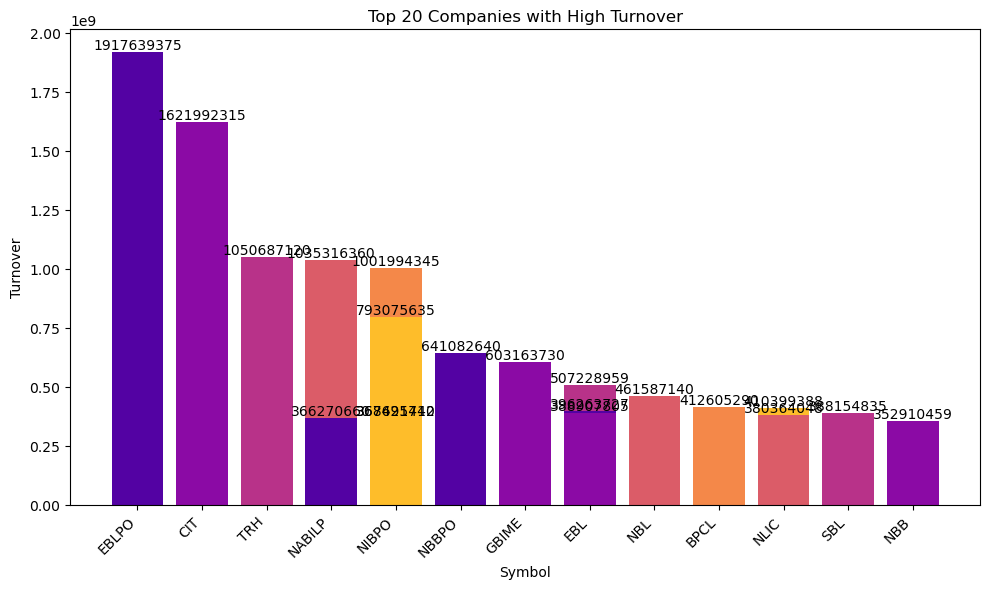

In [44]:
color_palette = sb.color_palette("plasma")  
plt.figure(figsize=(10, 6))
bars = plt.bar(df1['Symbol'], df1['Turnover'],color = color_palette)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
plt.xlabel('Symbol')
plt.ylabel('Turnover')
plt.title('Top 20 Companies with High Turnover')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [45]:
fig=px.scatter(df1,x='Symbol',
              y='Turnover',
               color='Turnover',
               size='Turnover'
              )
fig.update_layout(title="Top 20 Highest Turnover Symbols",
                 title_x=.5)

fig.show() 

In [46]:
top_5_companies = sorted_data.head(5)

In [47]:
top_5_companies

,S.no,Symbol,Date,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,,,
2019-02-14,27,EBLPO,2019-02-14,265.0,265.0,265.0,265.0,7236375,1.917639e+09
2016-09-18,12,CIT,2016-09-18,4765.0,4765.0,4745.0,4755.0,341113,1.621992e+09
2014-06-25,130,TRH,2014-06-25,306.0,336.0,300.0,336.0,3127045,1.050687e+09
2014-07-06,72,NABILP,2014-07-06,1512.0,1570.0,1525.0,1565.0,661544,1.035316e+09
2015-01-25,80,NIBPO,2015-01-25,490.0,495.0,495.0,495.0,2024231,1.001994e+09


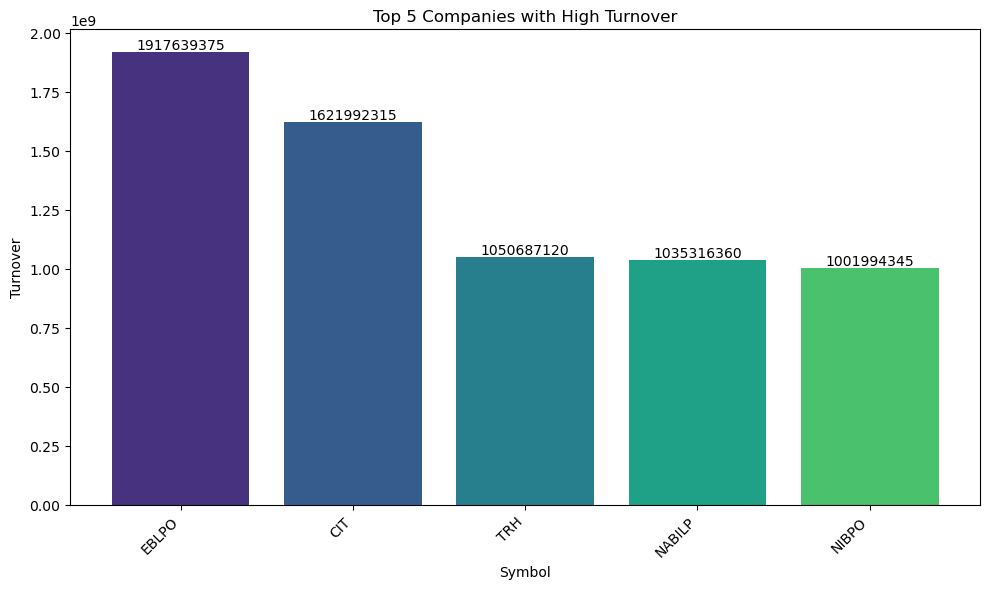

In [48]:
color_palette = sb.color_palette("viridis")  
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_companies['Symbol'], top_5_companies['Turnover'],color = color_palette)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
plt.xlabel('Symbol')
plt.ylabel('Turnover')
plt.title('Top 5 Companies with High Turnover')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#  companies with LOW Turnover

#checking companies with Zero Turnover

In [49]:
df


,S.no,Symbol,Date,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,,,
2012-01-01,0,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,1962,221706.0
2012-01-01,57,PDB,2012-01-01,64.0,65.0,64.0,65.0,260,16900.0
2012-01-01,55,PBSL,2012-01-01,106.0,106.0,104.0,106.0,20,2120.0
2012-01-01,54,OHL,2012-01-01,80.0,81.0,79.0,79.0,530,41870.0
2012-01-01,53,NTC,2012-01-01,422.0,430.0,425.0,427.0,450,192150.0
...,...,...,...,...,...,...,...,...,...
2020-03-22,33,HDL,2020-03-22,1327.0,1328.0,1275.0,1280.0,11330,14502400.0
2020-03-22,32,HDHPC,2020-03-22,84.0,84.0,82.0,82.0,220,18040.0
2020-03-22,31,HBL,2020-03-22,510.0,510.0,500.0,500.0,1158,579000.0


# checking & removing companies with Zero Turnover

In [50]:
df = df[df['Turnover'] != 0]
df


,S.no,Symbol,Date,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,,,
2012-01-01,0,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,1962,221706.0
2012-01-01,57,PDB,2012-01-01,64.0,65.0,64.0,65.0,260,16900.0
2012-01-01,55,PBSL,2012-01-01,106.0,106.0,104.0,106.0,20,2120.0
2012-01-01,54,OHL,2012-01-01,80.0,81.0,79.0,79.0,530,41870.0
2012-01-01,53,NTC,2012-01-01,422.0,430.0,425.0,427.0,450,192150.0
...,...,...,...,...,...,...,...,...,...
2020-03-22,33,HDL,2020-03-22,1327.0,1328.0,1275.0,1280.0,11330,14502400.0
2020-03-22,32,HDHPC,2020-03-22,84.0,84.0,82.0,82.0,220,18040.0
2020-03-22,31,HBL,2020-03-22,510.0,510.0,500.0,500.0,1158,579000.0


# Sorting companies with Low turnover

In [52]:
df1=df.sort_values(by="Turnover",ascending=True)[:20].reset_index(drop=True)
df1

,S.no,Symbol,Date,Open,High,Low,Close,Vol,Turnover
0,48,JEFL,2018-05-07,114.0,114.0,114.0,114.0,1,114.0
1,16,CFCL,2018-09-10,122.0,122.0,122.0,122.0,1,122.0
2,44,JEFL,2018-03-04,123.0,123.0,123.0,123.0,1,123.0
3,55,KNBL,2018-07-23,135.0,135.0,135.0,135.0,1,135.0
4,96,NGPL,2018-10-02,146.0,146.0,146.0,146.0,1,146.0
5,123,RLFL,2017-12-12,155.0,152.0,152.0,152.0,1,152.0
6,128,RLFL,2017-11-29,154.0,153.0,153.0,153.0,1,153.0
7,50,KADBL,2018-08-08,196.0,196.0,196.0,196.0,1,196.0
8,115,RHPC,2018-11-04,100.0,100.0,100.0,100.0,2,200.0
9,151,UFL,2018-01-10,219.0,216.0,216.0,216.0,1,216.0


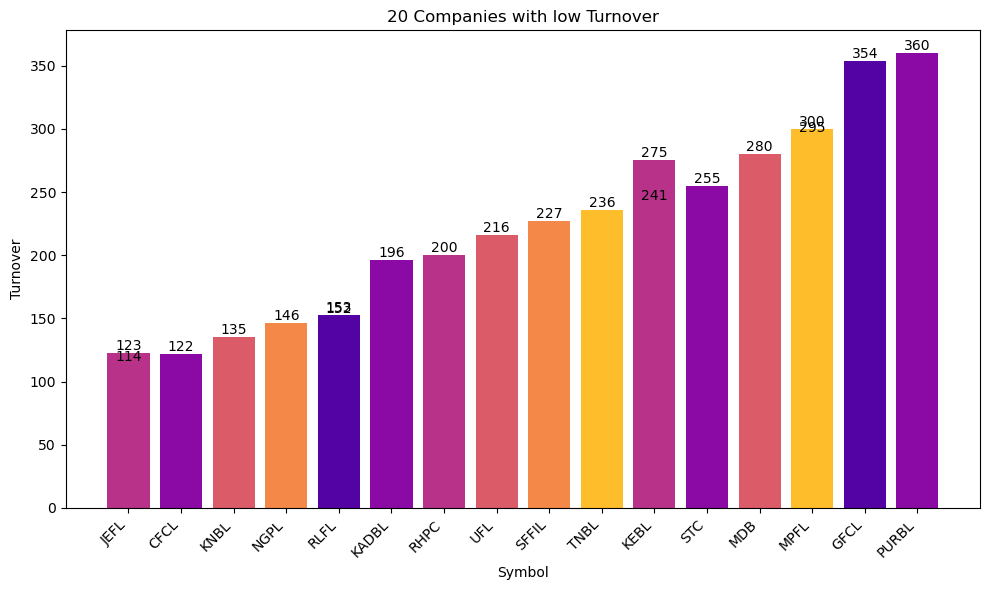

In [53]:
color_palette = sb.color_palette("plasma")  
plt.figure(figsize=(10, 6))
bars = plt.bar(df1['Symbol'], df1['Turnover'],color = color_palette)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
plt.xlabel('Symbol')
plt.ylabel('Turnover')
plt.title('20 Companies with low Turnover')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [54]:
fig=px.scatter(df1,x='Symbol',
              y='Turnover',
               color='Turnover',
               size='Turnover'
              )
fig.update_layout(title="Top 20 Lowest Turnover Symbols",
                 title_x=.5)

fig.show()


In [55]:
low_5_companies = df1.head(5)

In [64]:
low_5_companies

,S.no,Symbol,Date,Open,High,Low,Close,Vol,Turnover
0,48,JEFL,2018-05-07,114.0,114.0,114.0,114.0,1,114.0
1,16,CFCL,2018-09-10,122.0,122.0,122.0,122.0,1,122.0
2,44,JEFL,2018-03-04,123.0,123.0,123.0,123.0,1,123.0
3,55,KNBL,2018-07-23,135.0,135.0,135.0,135.0,1,135.0
4,96,NGPL,2018-10-02,146.0,146.0,146.0,146.0,1,146.0


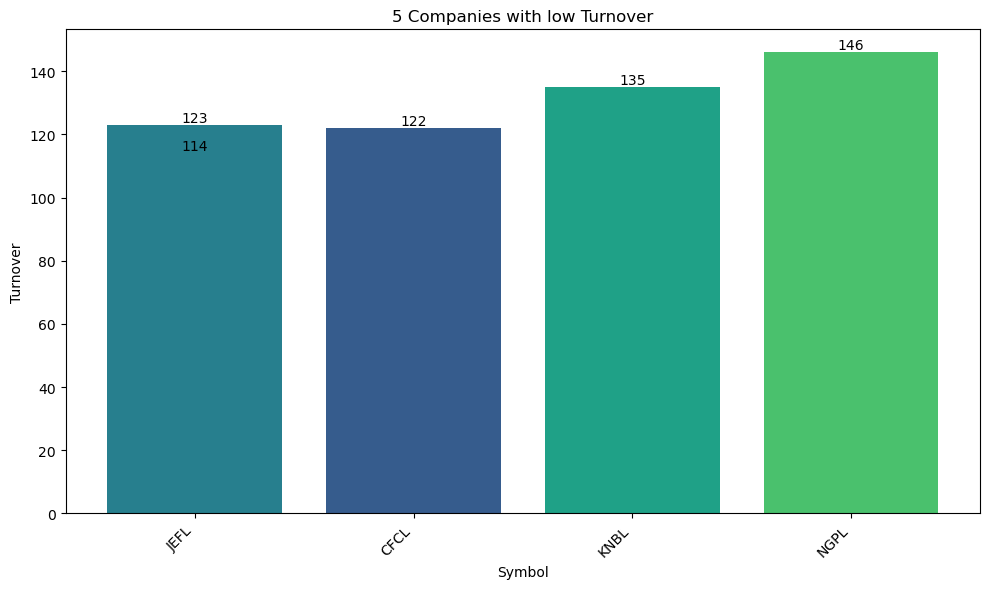

In [65]:
color_palette = sb.color_palette("viridis")  
plt.figure(figsize=(10, 6))
bars = plt.bar(low_5_companies['Symbol'], low_5_companies['Turnover'],color = color_palette)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
plt.xlabel('Symbol')
plt.ylabel('Turnover')
plt.title('5 Companies with low Turnover')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Data analysis using Data Visualization


In [66]:
df

,Symbol,Date,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,,
2012-01-01,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,1962,221706.0
2012-01-01,PDB,2012-01-01,64.0,65.0,64.0,65.0,260,16900.0
2012-01-01,PBSL,2012-01-01,106.0,106.0,104.0,106.0,20,2120.0
2012-01-01,OHL,2012-01-01,80.0,81.0,79.0,79.0,530,41870.0
2012-01-01,NTC,2012-01-01,422.0,430.0,425.0,427.0,450,192150.0
...,...,...,...,...,...,...,...,...
2020-03-22,HDL,2020-03-22,1327.0,1328.0,1275.0,1280.0,11330,14502400.0
2020-03-22,HDHPC,2020-03-22,84.0,84.0,82.0,82.0,220,18040.0
2020-03-22,HBL,2020-03-22,510.0,510.0,500.0,500.0,1158,579000.0


In [67]:
df.drop(['S.no'],axis=1,inplace=True)

KeyError: "['S.no'] not found in axis"

In [68]:
df

,Symbol,Date,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,,
2012-01-01,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,1962,221706.0
2012-01-01,PDB,2012-01-01,64.0,65.0,64.0,65.0,260,16900.0
2012-01-01,PBSL,2012-01-01,106.0,106.0,104.0,106.0,20,2120.0
2012-01-01,OHL,2012-01-01,80.0,81.0,79.0,79.0,530,41870.0
2012-01-01,NTC,2012-01-01,422.0,430.0,425.0,427.0,450,192150.0
...,...,...,...,...,...,...,...,...
2020-03-22,HDL,2020-03-22,1327.0,1328.0,1275.0,1280.0,11330,14502400.0
2020-03-22,HDHPC,2020-03-22,84.0,84.0,82.0,82.0,220,18040.0
2020-03-22,HBL,2020-03-22,510.0,510.0,500.0,500.0,1158,579000.0


In [69]:
temp_df=df[['Open','High','Low','Close','Symbol','Date']]
temp_df=temp_df[temp_df['Date']<"2013"]
temp_df=temp_df[temp_df['Symbol']=="EBL"]
dates=temp_df['Date']
temp_df=temp_df[temp_df.columns[:-1]]
temp_df.head()


,Open,High,Low,Close,Symbol
Date,,,,,
2012-01-01,696.0,695.0,681.0,685.0,EBL
2012-01-02,685.0,714.0,680.0,714.0,EBL
2012-01-03,714.0,714.0,700.0,700.0,EBL
2012-01-04,700.0,700.0,680.0,681.0,EBL
2012-01-05,681.0,702.0,680.0,702.0,EBL


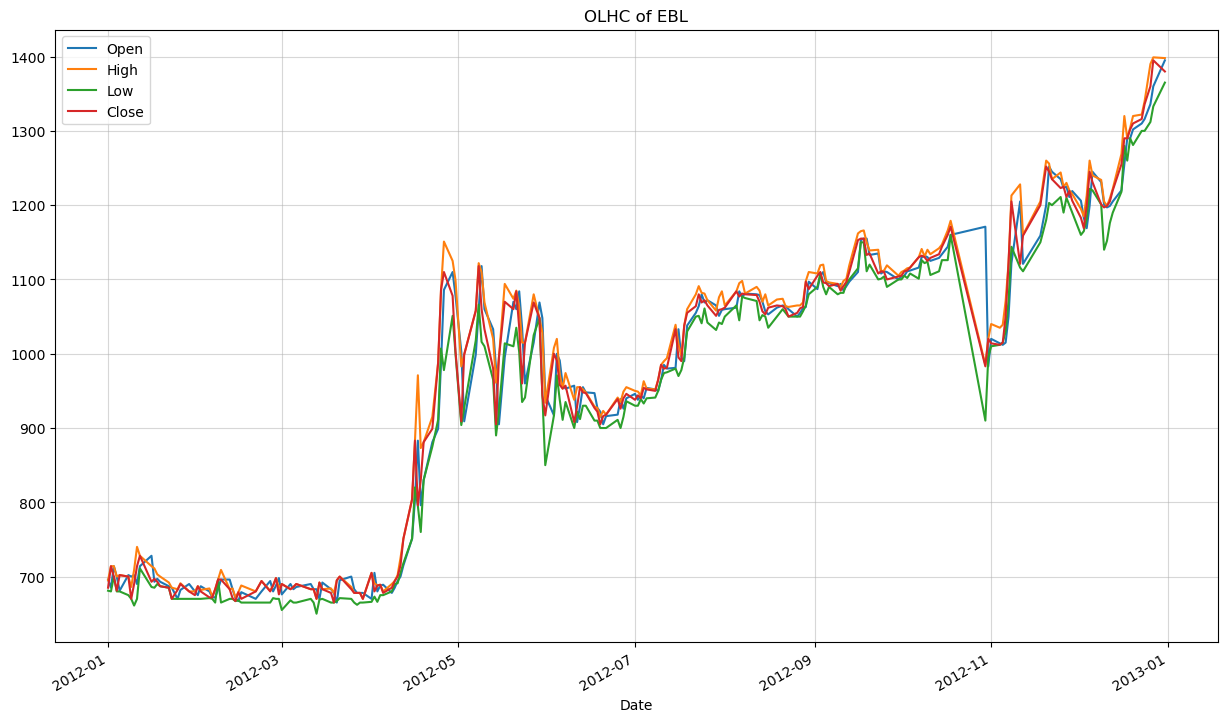

In [70]:
temp_df.plot(figsize=(15,9))
plt.grid(alpha=.5)
plt.title("OLHC of EBL")
plt.show()

# Finding the highest Turnover company

In [71]:
df['Turnover'].max()

1917639375.0

In [73]:
idx_max_turnover = df['Turnover'].idxmax()

# Retrieve the data of the company with the highest turnover
company_with_high_turnover = df.loc[idx_max_turnover]

print(company_with_high_turnover)


           Symbol       Date    Open    High     Low   Close   Vol   Turnover
Date                                                                         
2019-02-14  NMBMF 2019-02-14  1051.0  1051.0  1040.0  1050.0   292   306600.0
2019-02-14  NMFBS 2019-02-14  1637.0  1658.0  1627.0  1658.0   207   343206.0
2019-02-14   NNLB 2019-02-14   503.0   503.0   466.0   490.0  4194  2055060.0
2019-02-14  NSEWA 2019-02-14   593.0   593.0   554.0   554.0  2225  1232650.0
2019-02-14    NTC 2019-02-14   694.0   695.0   690.0   695.0  4895  3402025.0
...           ...        ...     ...     ...     ...     ...   ...        ...
2019-02-14   KMFL 2019-02-14   941.0   941.0   941.0   941.0    53    49873.0
2019-02-14   KNBL 2019-02-14   124.0   124.0   122.0   122.0    36     4392.0
2019-02-14   KPCL 2019-02-14    93.0    93.0    90.0    91.0  1900   172900.0
2019-02-14   KRBL 2019-02-14    96.0    96.0    95.0    95.0   410    38950.0
2019-02-14   KBBL 2019-02-14   207.0   207.0   207.0   207.0   7

In [74]:
df2=company_with_high_turnover.sort_values(by="Turnover",ascending=False)[:20].reset_index(drop=True)
df2

,Symbol,Date,Open,High,Low,Close,Vol,Turnover
0,EBLPO,2019-02-14,265.0,265.0,265.0,265.0,7236375,1.917639e+09
1,UPPER,2019-02-14,227.0,228.0,224.0,228.0,69628,1.587518e+07
2,PRVU,2019-02-14,230.0,231.0,227.0,229.0,61672,1.412289e+07
3,NCCB,2019-02-14,204.0,206.0,204.0,205.0,57775,1.184388e+07
4,CIT,2019-02-14,2560.0,2598.0,2540.0,2550.0,4478,1.141890e+07
5,MNBBLP,2019-02-14,216.0,216.0,216.0,216.0,50000,1.080000e+07
6,NMB,2019-02-14,310.0,311.0,307.0,308.0,30824,9.493792e+06
7,NIB,2019-02-14,514.0,516.0,510.0,512.0,16924,8.665088e+06
8,NLIC,2019-02-14,1019.0,1020.0,1002.0,1010.0,7221,7.293210e+06
9,NICA,2019-02-14,382.0,389.0,380.0,384.0,17211,6.609024e+06


In [75]:
df2.iloc[0]

Symbol                    EBLPO
Date        2019-02-14 00:00:00
Open                      265.0
High                      265.0
Low                       265.0
Close                     265.0
Vol                     7236375
Turnover           1917639375.0
Name: 0, dtype: object

# 'EBLPO recorded with highest Turnover of Rs 1917639392 in 2019-02-14 00:00:00'.

# Volume Traded Visualization.



In [76]:
df

,Symbol,Date,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,,
2012-01-01,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,1962,221706.0
2012-01-01,PDB,2012-01-01,64.0,65.0,64.0,65.0,260,16900.0
2012-01-01,PBSL,2012-01-01,106.0,106.0,104.0,106.0,20,2120.0
2012-01-01,OHL,2012-01-01,80.0,81.0,79.0,79.0,530,41870.0
2012-01-01,NTC,2012-01-01,422.0,430.0,425.0,427.0,450,192150.0
...,...,...,...,...,...,...,...,...
2020-03-22,HDL,2020-03-22,1327.0,1328.0,1275.0,1280.0,11330,14502400.0
2020-03-22,HDHPC,2020-03-22,84.0,84.0,82.0,82.0,220,18040.0
2020-03-22,HBL,2020-03-22,510.0,510.0,500.0,500.0,1158,579000.0


In [77]:
temp_df=df[['Symbol','Vol','Date']].sort_values(by='Vol',ascending=False)[:20]
temp_df


,Symbol,Vol,Date
Date,,,
2019-02-14,EBLPO,7236375,2019-02-14
2017-02-09,SEOS,5634564,2017-02-09
2017-02-09,NIBSF1,5513600,2017-02-09
2019-07-04,SEOS,5256974,2019-07-04
2016-07-28,GIMES1,4358585,2016-07-28
2017-02-09,NMBSF1,3376500,2017-02-09
2014-06-25,TRH,3127045,2014-06-25
2016-07-28,SEOS,3125622,2016-07-28
2016-06-26,NIBSF1,2961755,2016-06-26


# Let'S plot the companies with high Volume

In [78]:
fig=go.Figure(
    go.Bar(
    x=temp_df.Symbol,
    y=temp_df.Vol,
    textposition="inside",
    marker=dict(color=temp_df.Vol,
                   colorscale='balance'),
    text=temp_df.Vol,
    )
    )

fig.update_layout(title="Top 20 Highest Recorded Volumes/ Sales",
                 title_x=.5,
                 barmode='stack', xaxis={'categoryorder':'total descending'}
                 )

fig.show()

In [79]:
df.Symbol.nunique()

520

# Data with close price less than 50

In [80]:
df[df['Close']<50].head(20)

,Symbol,Date,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,,
2012-01-01,ARUN,2012-01-01,45.0,44.0,43.0,43.0,660,28380.0
2012-01-02,ARUN,2012-01-02,43.0,42.0,41.0,42.0,2300,96600.0
2012-01-03,ARUN,2012-01-03,42.0,43.0,43.0,43.0,500,21500.0
2012-01-04,NHPC,2012-01-04,51.0,50.0,48.0,48.0,3000,144000.0
2012-01-04,ARUN,2012-01-04,43.0,44.0,44.0,44.0,440,19360.0
2012-01-05,ARUN,2012-01-05,44.0,44.0,44.0,44.0,400,17600.0
2012-01-08,NHPC,2012-01-08,48.0,49.0,48.0,49.0,403500,19771500.0
2012-01-08,ARUN,2012-01-08,44.0,44.0,44.0,44.0,800,35200.0
2012-01-09,ARUN,2012-01-09,44.0,44.0,44.0,44.0,400,17600.0


In [81]:
df['Close'].nunique()

6753

# Data with Close price more than 5 thousand

In [82]:
Close_high=df[df['Close'] > 5000].set_index("Date")

In [83]:
Close_high

,Symbol,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,
2012-01-03,UNL,6273.0,6150.0,6150.0,6150.0,10,61500.0
2012-01-04,UNL,6150.0,6273.0,6273.0,6273.0,100,627300.0
2012-01-05,UNL,6273.0,6148.0,6148.0,6148.0,10,61480.0
2012-01-12,UNL,6148.0,6269.0,6148.0,6269.0,30,188070.0
2012-02-08,UNL,6269.0,6144.0,5669.0,5669.0,150,850350.0
...,...,...,...,...,...,...,...
2020-03-18,BNT,6300.0,6600.0,6300.0,6600.0,90,594000.0
2020-03-19,RBCL,8575.0,9050.0,8404.0,8900.0,648,5767200.0
2020-03-19,RBCLPO,7402.0,8100.0,7399.0,7450.0,493,3672850.0


In [84]:
companies=Close_high['Symbol'].unique()
companies

array(['UNL', 'NLIC', 'RBS', 'RBCL', 'RBCLPO', 'CIT', 'BNT', 'NBBL'],
      dtype=object)

'UNL', 'NLIC', 'RBS', 'RBCL', 'RBCLPO', 'CIT', 'BNT', 'NBBL' are Companies having High CLosing Price.

In [85]:
df['Close'].sort_values(ascending=False)

Date
2016-05-03    36000.00
2016-06-23    35700.00
2016-04-26    35350.00
2016-05-05    35280.00
2016-07-21    35230.00
                ...   
2019-10-01        6.58
2019-09-23        6.57
2019-12-01        6.55
2019-11-28        6.55
2019-11-26        6.54
Name: Close, Length: 250739, dtype: float64

In [86]:
df[df['Close'] == 36000].set_index("Date")

,Symbol,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,
2016-05-03,UNL,35350.0,36000.0,36000.0,36000.0,10,360000.0


# Unilever company with symbol 'UNL' has highest Open and highest Close price

In [87]:
unilever_data=df[df['Symbol']=='UNL'].set_index('Date')
unilever_data

,Symbol,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,
2012-01-03,UNL,6273.0,6150.0,6150.0,6150.0,10,61500.0
2012-01-04,UNL,6150.0,6273.0,6273.0,6273.0,100,627300.0
2012-01-05,UNL,6273.0,6148.0,6148.0,6148.0,10,61480.0
2012-01-12,UNL,6148.0,6269.0,6148.0,6269.0,30,188070.0
2012-02-08,UNL,6269.0,6144.0,5669.0,5669.0,150,850350.0
...,...,...,...,...,...,...,...
2020-03-01,UNL,22865.0,22865.0,21959.0,22000.0,110,2420000.0
2020-03-03,UNL,22440.0,22440.0,22440.0,22440.0,10,224400.0
2020-03-05,UNL,21992.0,21992.0,21553.0,21553.0,20,431060.0


In [88]:
unilever_data.head()

,Symbol,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,
2012-01-03,UNL,6273.0,6150.0,6150.0,6150.0,10,61500.0
2012-01-04,UNL,6150.0,6273.0,6273.0,6273.0,100,627300.0
2012-01-05,UNL,6273.0,6148.0,6148.0,6148.0,10,61480.0
2012-01-12,UNL,6148.0,6269.0,6148.0,6269.0,30,188070.0
2012-02-08,UNL,6269.0,6144.0,5669.0,5669.0,150,850350.0


Let's plot OHLC of 'UNL'

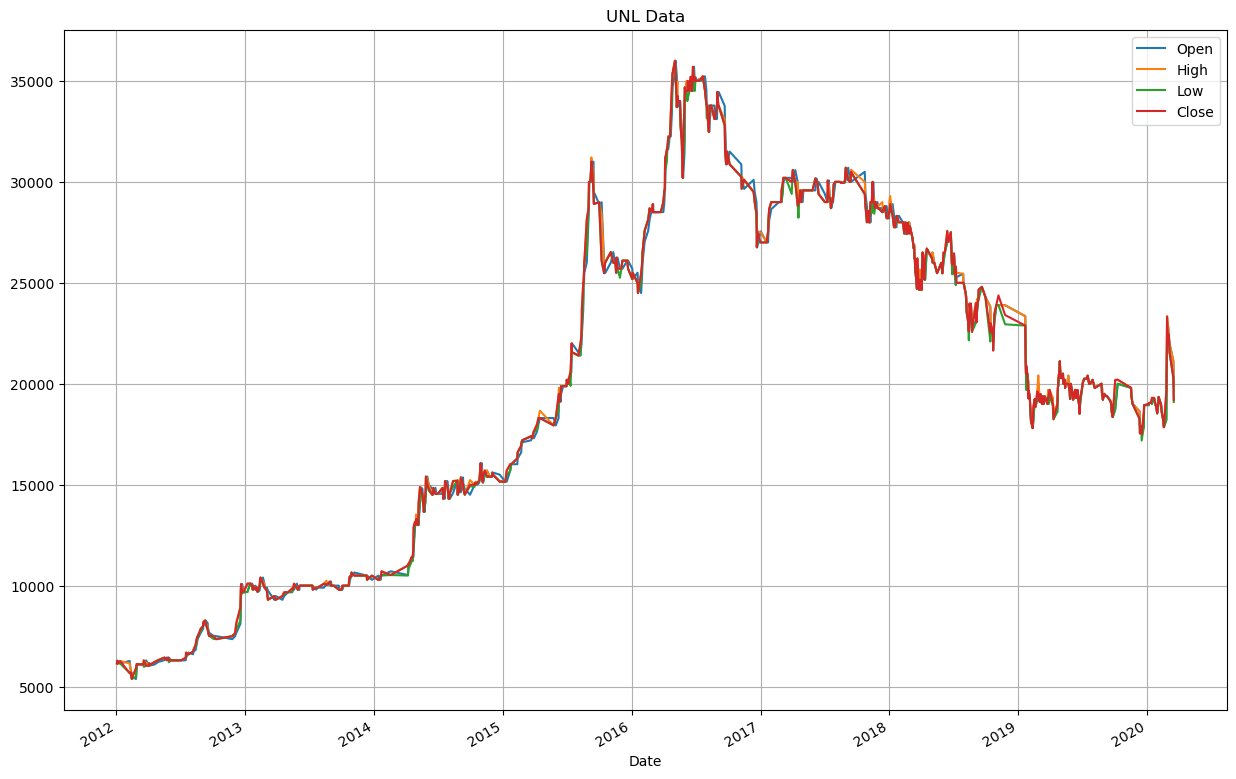

In [89]:
unilever_data[['Open','High','Low','Close']].plot(figsize=(15,10))
plt.grid()
plt.title("UNL Data")
plt.show()

In [90]:
RBCL_data=df[df['Symbol']=='RBCL'].set_index('Date')
RBCL_data

,Symbol,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,
2015-06-22,RBCL,5100.0,5202.0,5202.0,5202.0,11,57222.0
2015-06-23,RBCL,5202.0,5098.0,5098.0,5098.0,214,1090972.0
2015-06-24,RBCL,5098.0,5098.0,5098.0,5098.0,25,127450.0
2015-07-01,RBCL,5098.0,5199.0,5096.0,5096.0,285,1452360.0
2015-07-02,RBCL,5096.0,4995.0,4995.0,4995.0,51,254745.0
...,...,...,...,...,...,...,...
2020-03-15,RBCL,9536.0,9536.0,9216.0,9216.0,470,4331520.0
2020-03-16,RBCL,9310.0,9496.0,9100.0,9225.0,475,4381875.0
2020-03-17,RBCL,9150.0,9150.0,8815.0,8815.0,604,5324260.0


"""Let's plot OHLC of RBCL"""

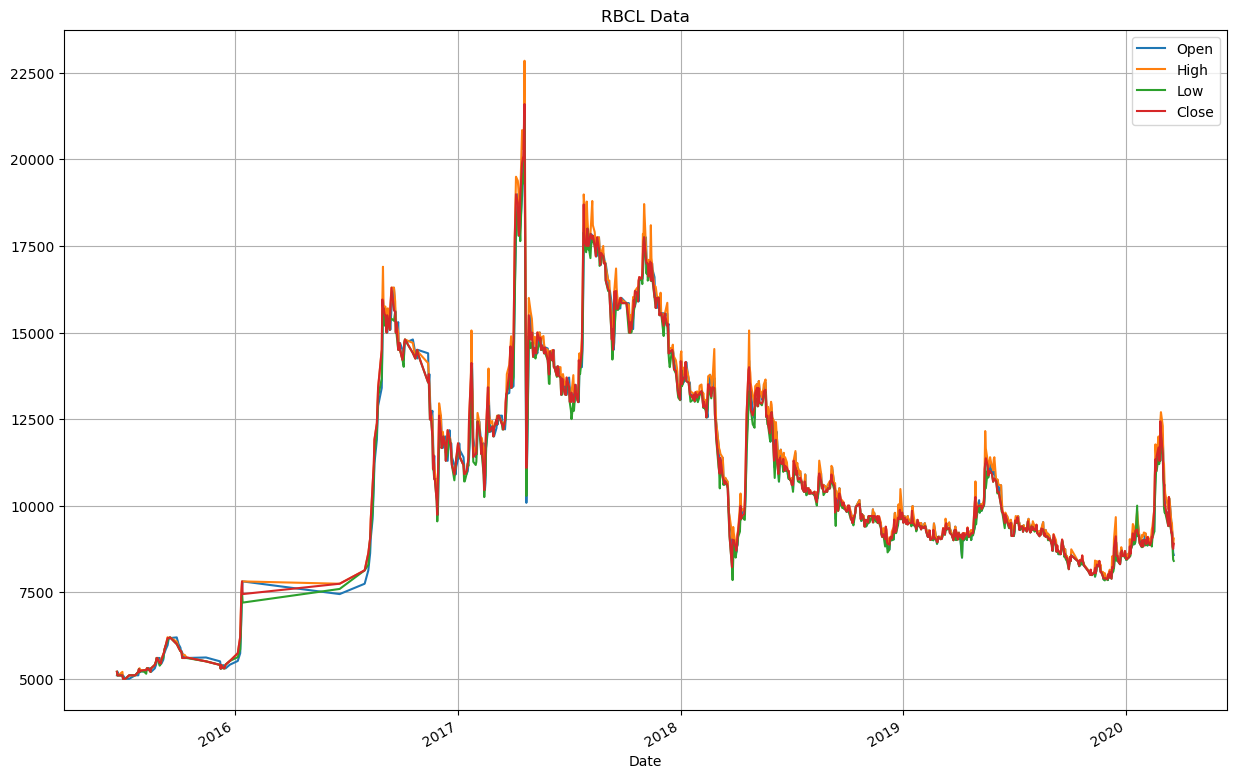

In [91]:
RBCL_data[['Open','High','Low','Close']].plot(figsize=(15,10))
plt.grid()
plt.title("RBCL Data")
plt.show()


In [92]:
RBCLPO_data=df[df['Symbol']=='RBCLPO'].set_index('Date')
RBCLPO_data

,Symbol,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,
2015-07-02,RBCLPO,4150.0,4145.0,4145.0,4145.0,100,414500.0
2015-07-30,RBCLPO,4145.0,4065.0,4000.0,4000.0,638,2552000.0
2015-08-03,RBCLPO,4000.0,3920.0,3920.0,3920.0,13,50960.0
2015-08-10,RBCLPO,3920.0,3842.0,3842.0,3842.0,13,49946.0
2015-08-11,RBCLPO,3842.0,3766.0,3546.0,3546.0,939,3329694.0
...,...,...,...,...,...,...,...
2020-03-16,RBCLPO,7842.0,8157.0,7842.0,7994.0,522,4172868.0
2020-03-17,RBCLPO,7837.0,8000.0,7600.0,7800.0,350,2730000.0
2020-03-18,RBCLPO,7644.0,7701.0,7405.0,7550.0,395,2982250.0


#Let's plot the OHLC of 'RBCLPO'

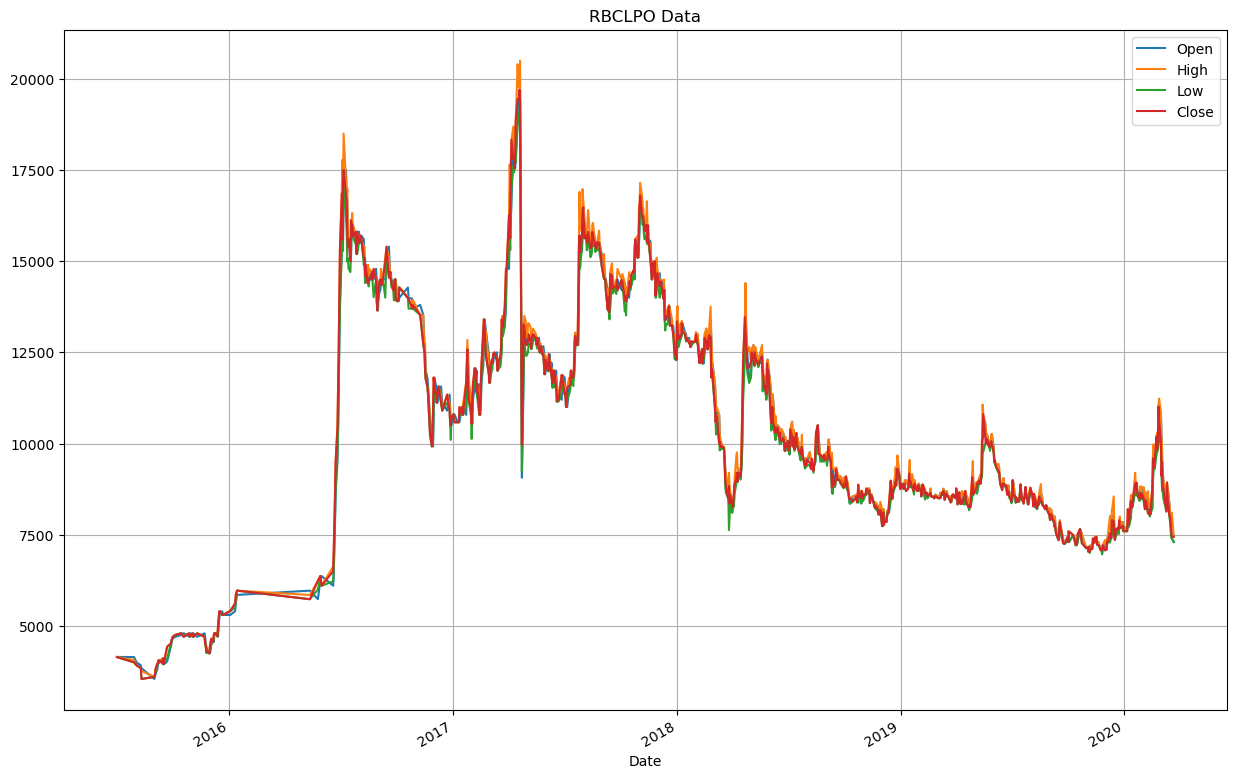

In [93]:
RBCLPO_data[['Open','High','Low','Close']].plot(figsize=(15,10))
plt.grid()
plt.title("RBCLPO Data")
plt.show()


# Companies with Closing price more than 15,000

In [94]:
Close_high=df[df['Close'] > 15000].set_index("Date")
Close_high

,Symbol,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,
2014-05-28,UNL,14667.0,15400.0,15400.0,15400.0,10,154000.0
2014-07-21,UNL,14587.0,15175.0,14878.0,15175.0,40,607000.0
2014-07-22,UNL,15175.0,15175.0,15175.0,15175.0,30,455250.0
2014-08-13,UNL,14596.0,15184.0,14887.0,15184.0,20,303680.0
2014-08-25,UNL,15184.0,15200.0,15200.0,15200.0,20,304000.0
...,...,...,...,...,...,...,...
2020-03-01,UNL,22865.0,22865.0,21959.0,22000.0,110,2420000.0
2020-03-03,UNL,22440.0,22440.0,22440.0,22440.0,10,224400.0
2020-03-05,UNL,21992.0,21992.0,21553.0,21553.0,20,431060.0


In [95]:
companies=Close_high['Symbol'].unique()
companies


array(['UNL', 'RBCLPO', 'RBCL'], dtype=object)

# 'UNL','RBCLPO','RBCL' companies having highest CLOSING PRICE

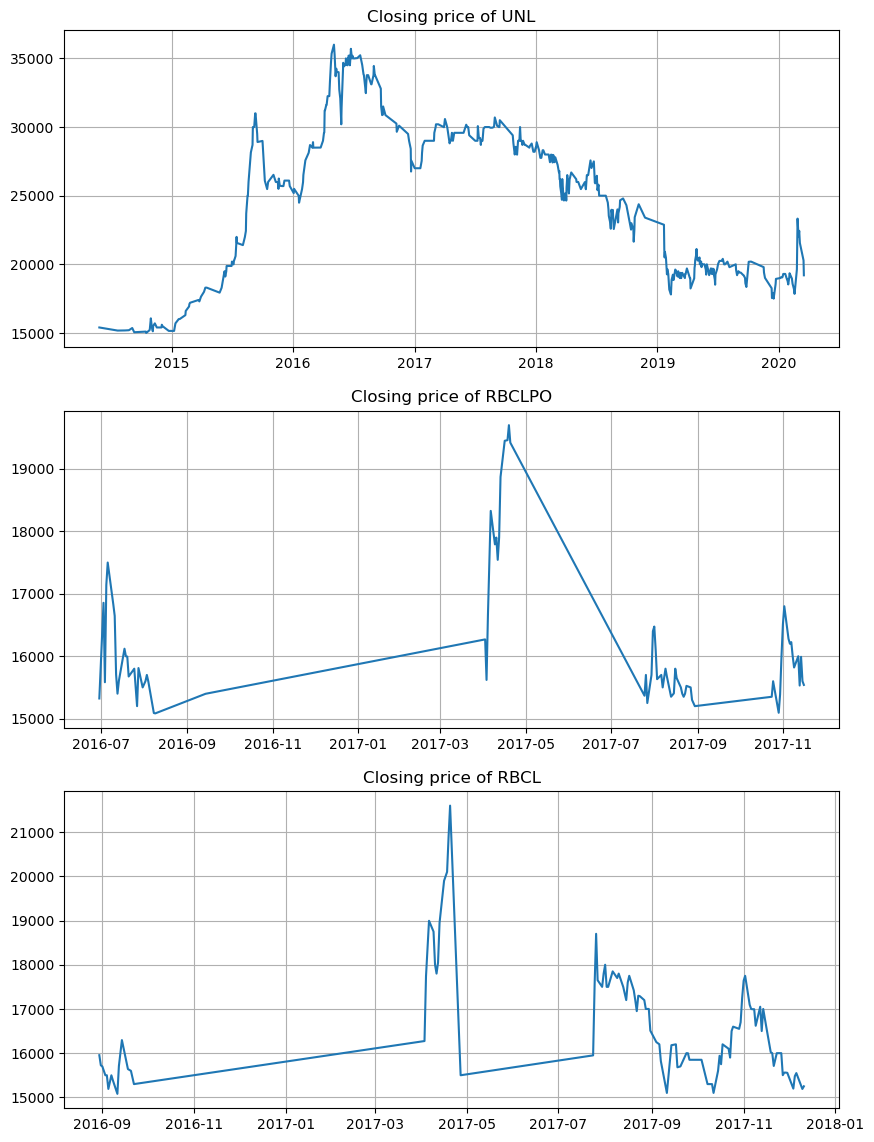

In [96]:
fig,axes=plt.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(Close_high[Close_high["Symbol"]==comp]["Close"])
    axs.grid()
    axs.set_title(f"Closing price of {comp}")


In [97]:
Open_high=df[df['Open'] > 15000].set_index("Date")
Open_high

,Symbol,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,
2014-06-01,UNL,15400.0,15300.0,15000.0,15000.0,30,450000.0
2014-07-22,UNL,15175.0,15175.0,15175.0,15175.0,30,455250.0
2014-07-28,UNL,15175.0,14872.0,14872.0,14872.0,50,743600.0
2014-08-25,UNL,15184.0,15200.0,15200.0,15200.0,20,304000.0
2014-08-26,UNL,15200.0,14897.0,14500.0,14500.0,1000,14500000.0
...,...,...,...,...,...,...,...
2020-03-01,UNL,22865.0,22865.0,21959.0,22000.0,110,2420000.0
2020-03-03,UNL,22440.0,22440.0,22440.0,22440.0,10,224400.0
2020-03-05,UNL,21992.0,21992.0,21553.0,21553.0,20,431060.0


In [98]:
companies=Open_high['Symbol'].unique()
companies

array(['UNL', 'RBCLPO', 'RBCL'], dtype=object)

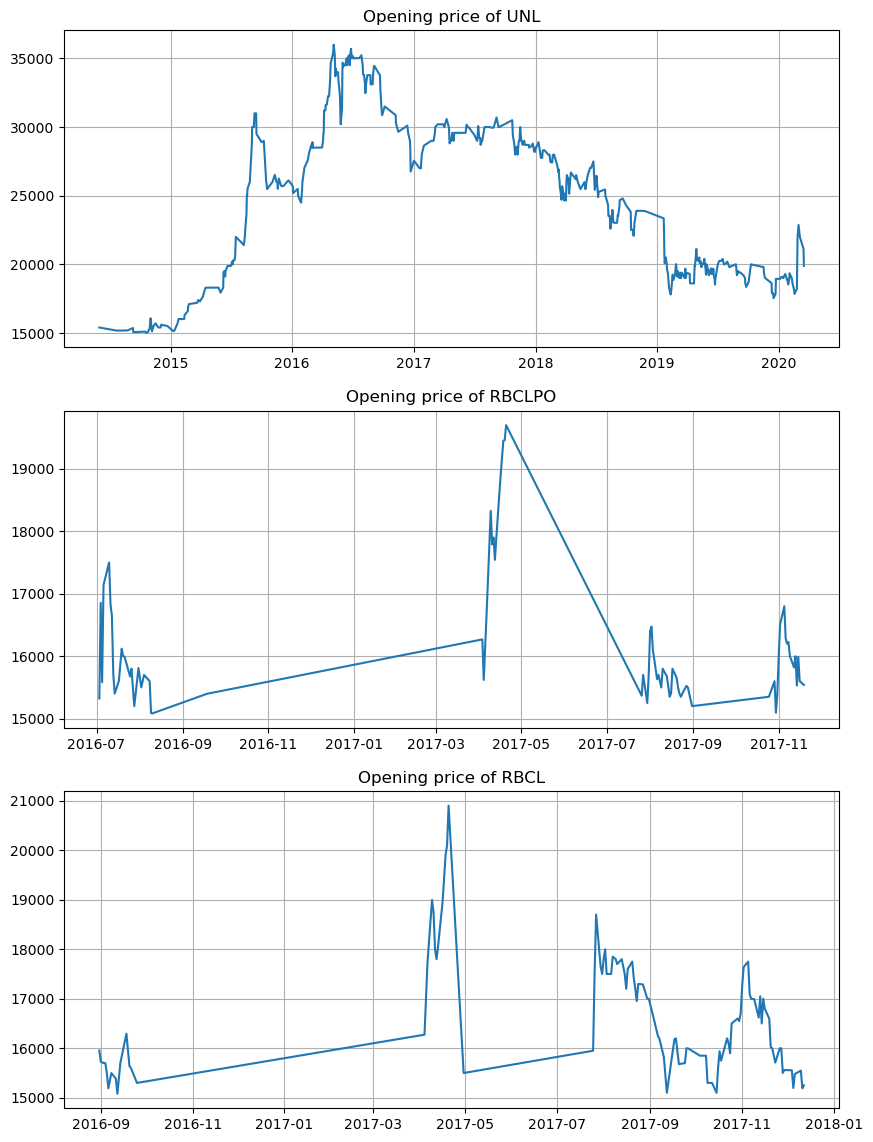

In [99]:
fig,axes=plt.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(Open_high[Open_high["Symbol"]==comp]["Open"])
    axs.grid()
    axs.set_title(f"Opening price of {comp}")

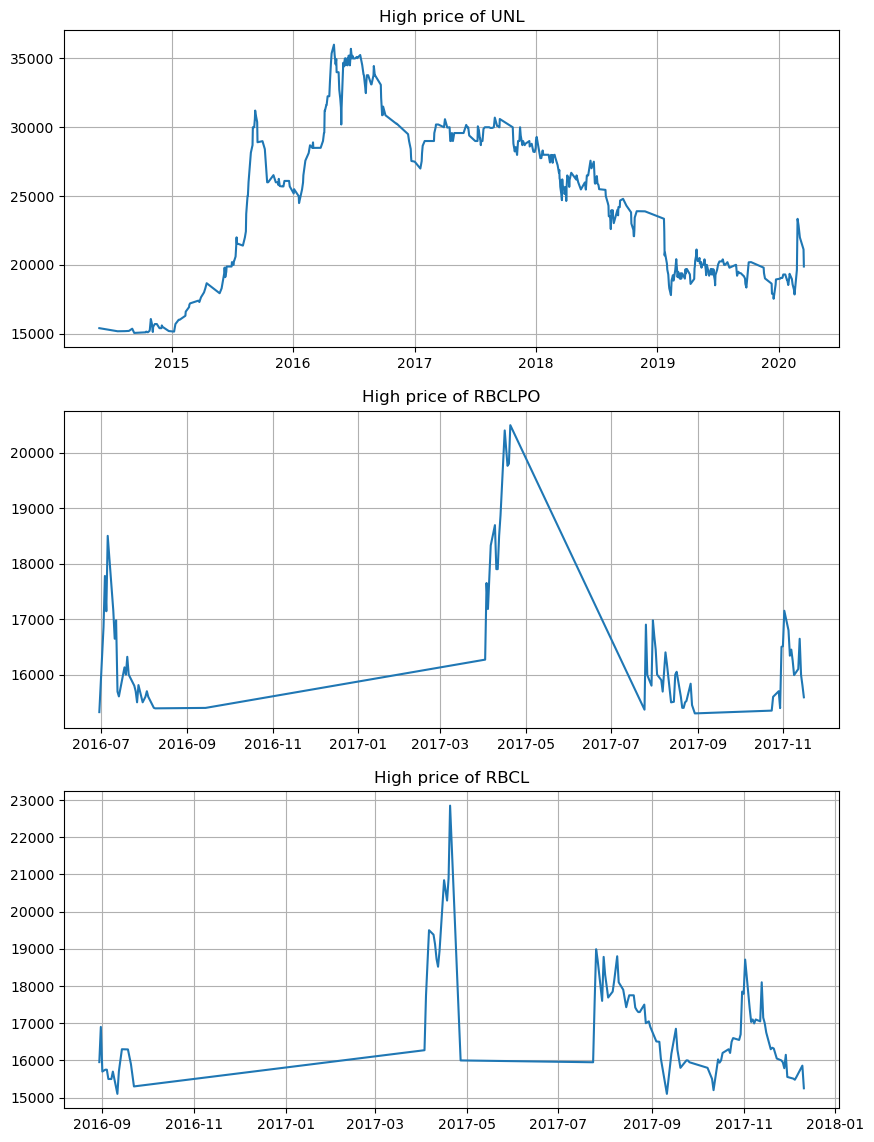

In [100]:
fig,axes=plt.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(Close_high[Close_high["Symbol"]==comp]["High"])
    axs.grid()
    axs.set_title(f"High price of {comp}")

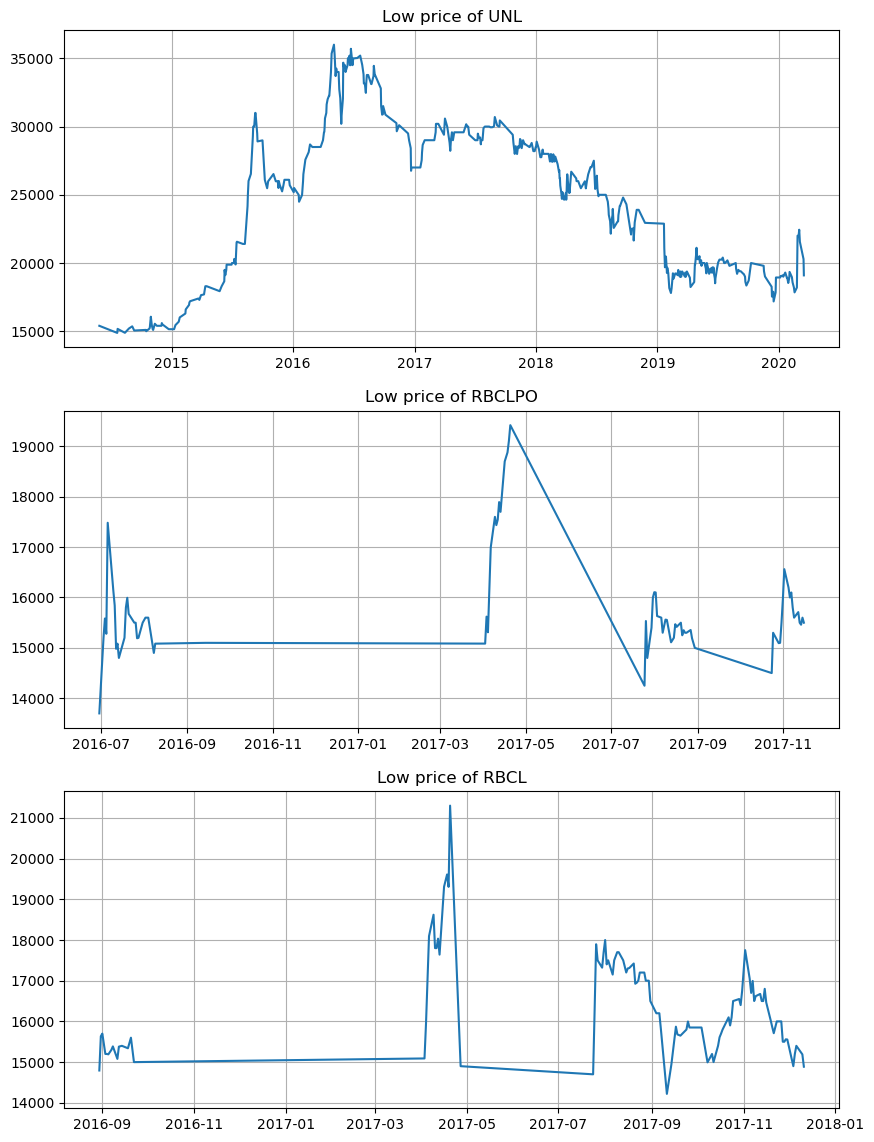

In [101]:
fig,axes=plt.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(Close_high[Close_high["Symbol"]==comp]["Low"])
    axs.grid()
    axs.set_title(f"Low price of {comp}")


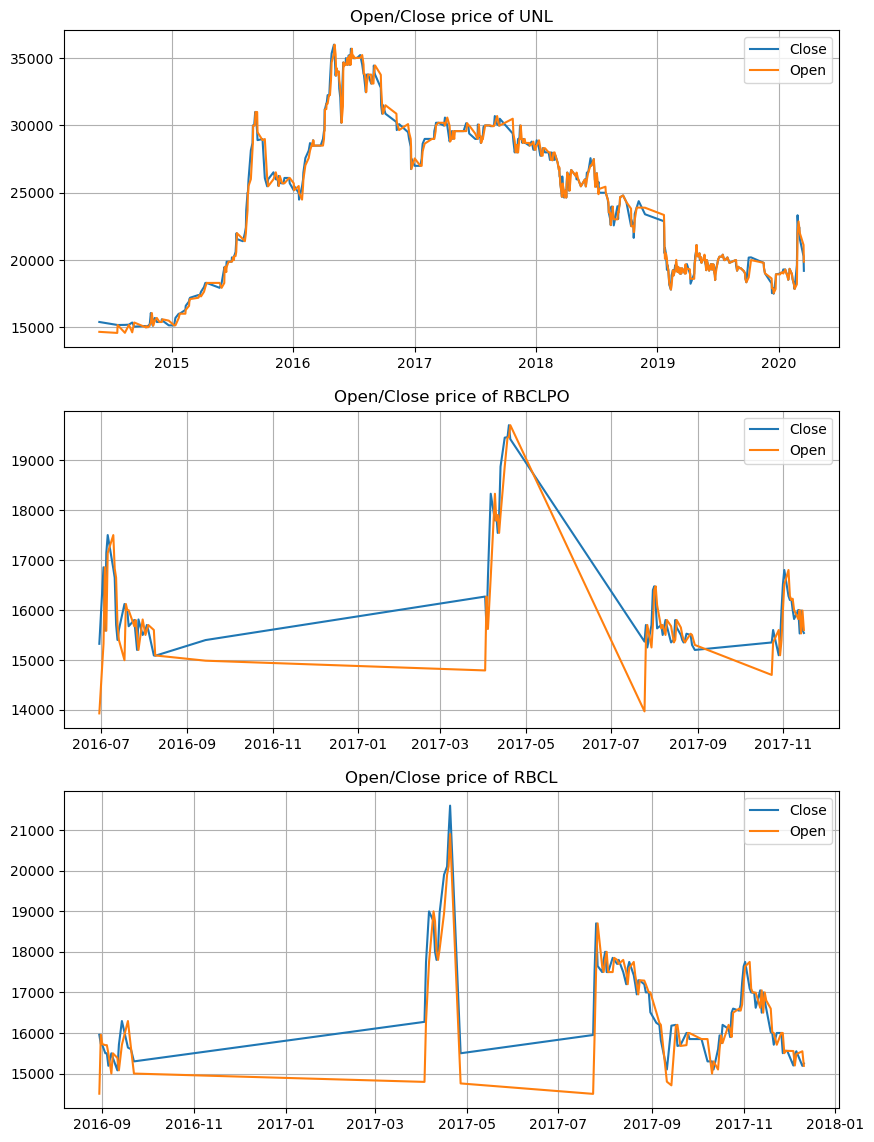

In [102]:
fig,axes=plt.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(Close_high[Close_high["Symbol"]==comp]["Close"],label="Close")
    axs.plot(Close_high[Close_high["Symbol"]==comp]["Open"],label="Open")
    axs.grid()
    axs.legend()
    axs.set_title(f"Open/Close price of {comp}")

# Plotting the OHLC OF all 3 companies

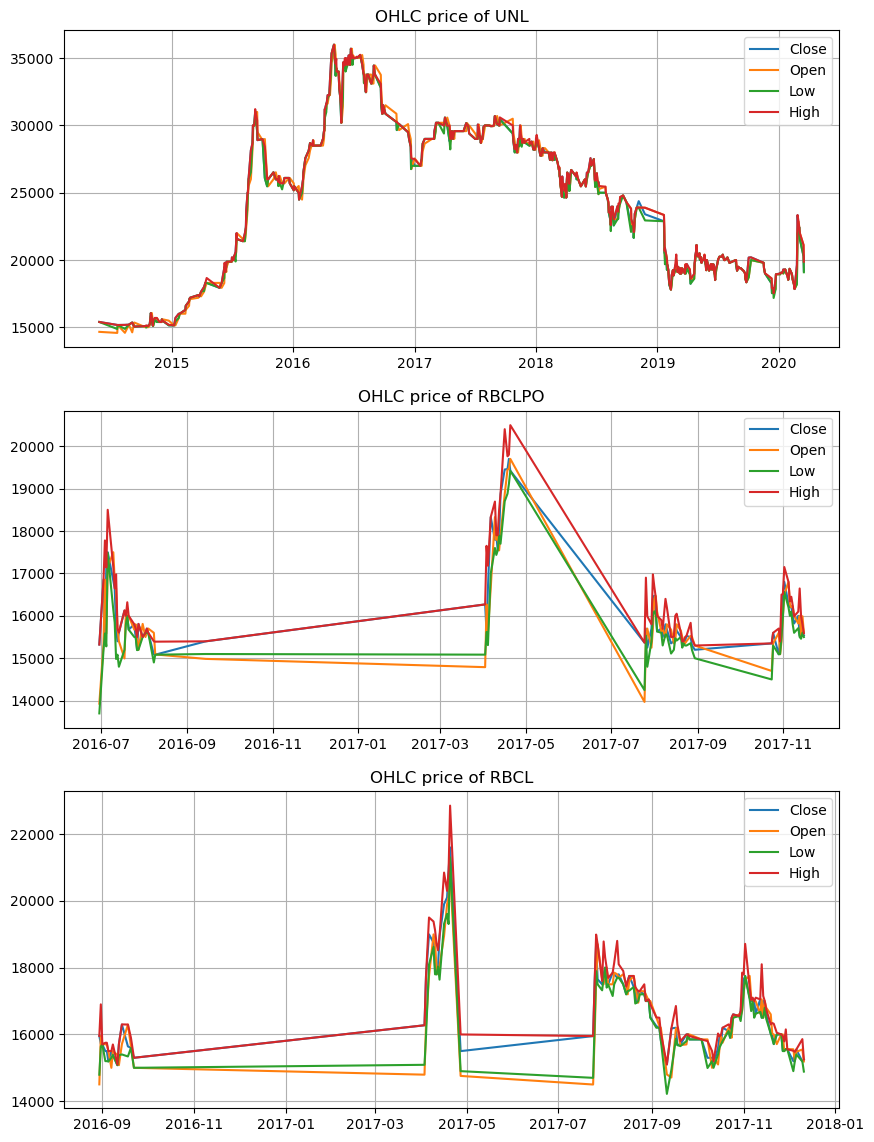

In [103]:
fig,axes=plt.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(Close_high[Close_high["Symbol"]==comp]["Close"],label="Close")
    axs.plot(Close_high[Close_high["Symbol"]==comp]["Open"],label="Open")
    axs.plot(Close_high[Close_high["Symbol"]==comp]["Low"],label="Low")
    axs.plot(Close_high[Close_high["Symbol"]==comp]["High"],label="High")
    axs.grid()
    axs.legend()
    axs.set_title(f"OHLC price of {comp}")

# Plotting the Volume all 3 Companies

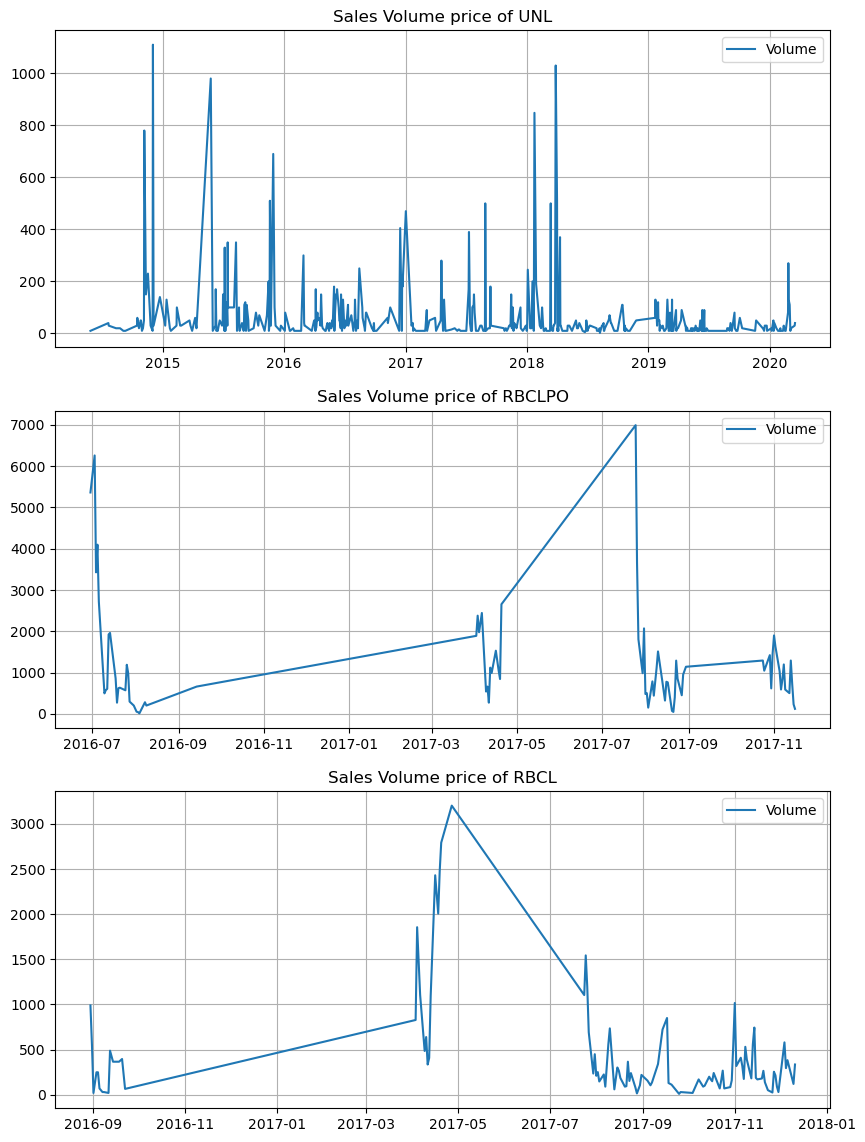

In [104]:
fig,axes=plt.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(Close_high[Close_high["Symbol"]==comp]["Vol"],label="Volume")
    axs.grid()
    axs.legend()
    axs.set_title(f"Sales Volume price of {comp}")



#Financial Analysis Topic

Moving Windows.

Moving windows are there when you compute the statistic on a window of data represented by a particular period of time and the slide the window across the data by a specified interval. That's why, the statistic is continually calculated as long as the window falls first with in the dates of the time series.

Daily Percentage Change.

To calculate the Daily Percentage we have a formula.

In Pandas we have .pct.change() function to calculate percentage change. By default, it calculates percentage change of current element(close) from the previous element(close) i.e.,
Daily_Percentage_Change = ((Today Close - Yesterday Close)/Yesterday Close)*100
This shows us about percentage gain or loss of the stock, this is necessary to predict the future values of the stock. And it's very helpful and analyzing Volatility of the stock.
Daily_Percentage_change is also called Daily_returns or returns

# FINDING the rolling mean of all 3 Companies.

In [105]:
ma_days = [10, 20, 50]
for ma in ma_days:
    for company in companies:
        column_name = f"MA for {ma} days"
        Close_high[column_name] =Close_high['Close'].rolling(ma).mean()

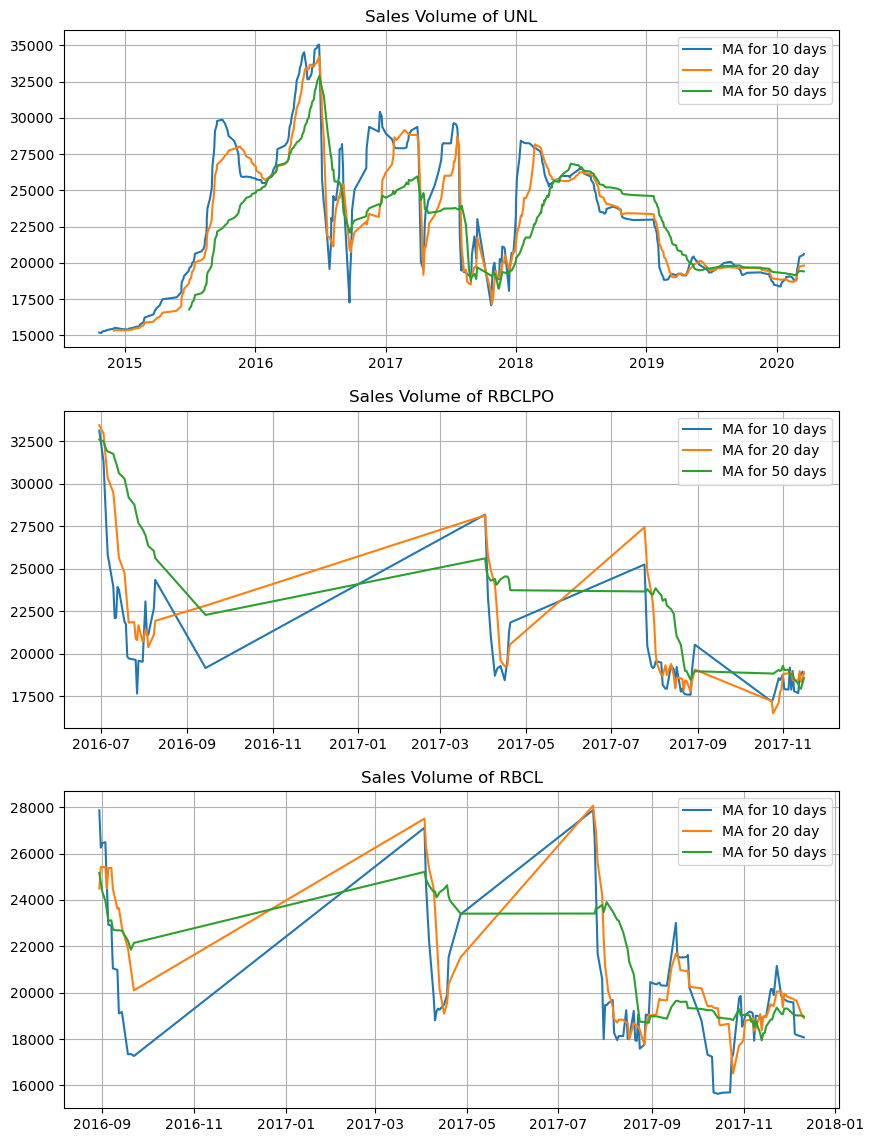

In [106]:
fig,axes=plt.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(Close_high[Close_high["Symbol"]==comp]["MA for 10 days"],label="MA for 10 days")
    axs.plot(Close_high[Close_high["Symbol"]==comp]["MA for 20 days"],label="MA for 20 day")
    axs.plot(Close_high[Close_high["Symbol"]==comp]["MA for 50 days"],label="MA for 50 days")    
    axs.grid()
    axs.legend()
    axs.set_title(f"Sales Volume of {comp}")

#Daily Percentage Change.

To calculate the Daily Percentage we have a formula.

In Pandas we have .pct.change() function to calculate percentage change. By default, it calculates percentage change of current element(close) from the previous element(close) i.e.,
Daily_Percentage_Change = ((Today Close - Yesterday Close)/Yesterday Close)*100
This shows us about percentage gain or loss of the stock, this is necessary to predict the future values of the stock. And it's very helpful and analyzing Volatility of the stock.
Daily_Percentage_change is also called Daily_returns or returns

# Finding the percentage of change in close price than previous close

In [107]:
for company in companies:
    Close_high['D_Return'] = Close_high['Close'].pct_change()
    

In [108]:
Close_high

,Symbol,Open,High,Low,Close,Vol,Turnover,MA for 10 days,MA for 20 days,MA for 50 days,D_Return
Date,,,,,,,,,,,
2014-05-28,UNL,14667.0,15400.0,15400.0,15400.0,10,154000.0,NaN,NaN,NaN,NaN
2014-07-21,UNL,14587.0,15175.0,14878.0,15175.0,40,607000.0,NaN,NaN,NaN,-0.014610
2014-07-22,UNL,15175.0,15175.0,15175.0,15175.0,30,455250.0,NaN,NaN,NaN,0.000000
2014-08-13,UNL,14596.0,15184.0,14887.0,15184.0,20,303680.0,NaN,NaN,NaN,0.000593
2014-08-25,UNL,15184.0,15200.0,15200.0,15200.0,20,304000.0,NaN,NaN,NaN,0.001054
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,UNL,22865.0,22865.0,21959.0,22000.0,110,2420000.0,19856.8,19433.65,19346.66,-0.057008
2020-03-03,UNL,22440.0,22440.0,22440.0,22440.0,10,224400.0,20195.8,19608.60,19394.76,0.020000
2020-03-05,UNL,21992.0,21992.0,21553.0,21553.0,20,431060.0,20416.1,19736.25,19420.82,-0.039528


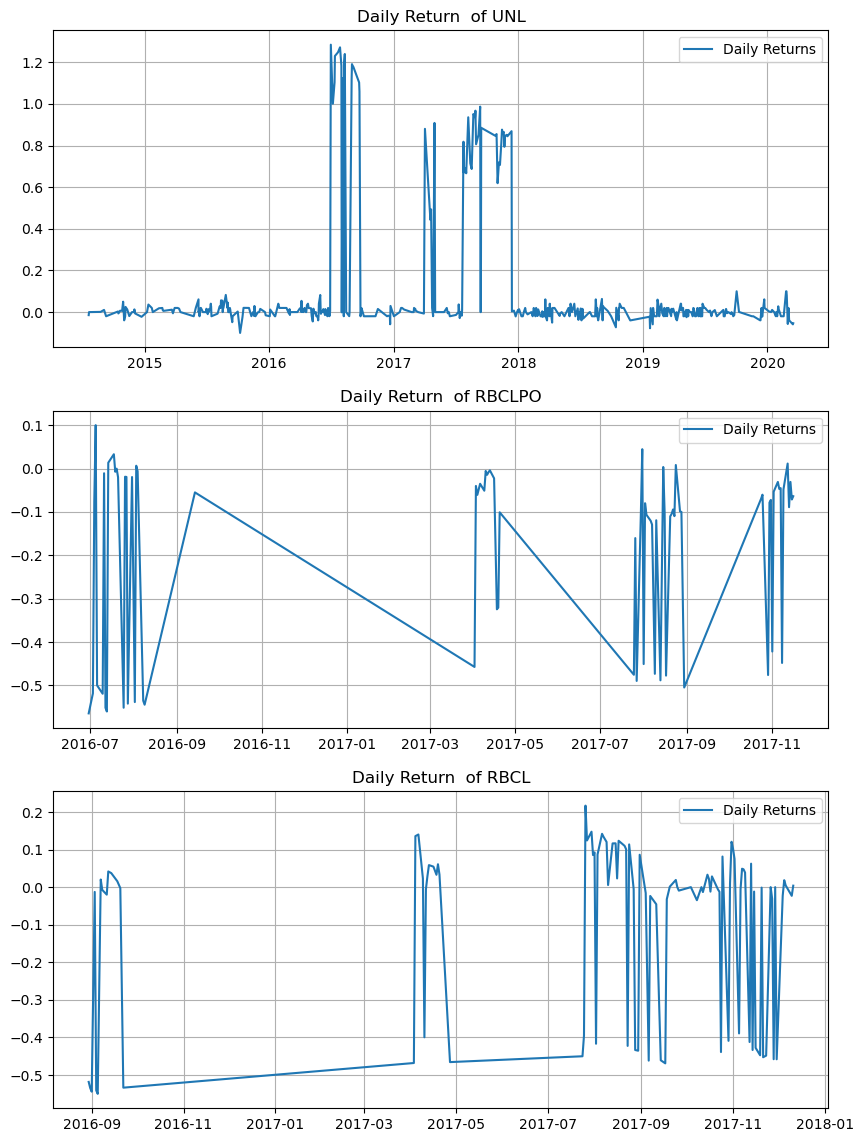

In [109]:
fig,axes=plt.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(Close_high[Close_high["Symbol"]==comp]["D_Return"],label="Daily Returns")    
    axs.grid()
    axs.legend()
    axs.set_title(f"Daily Return  of {comp}")

 

In [110]:
Close_high

,Symbol,Open,High,Low,Close,Vol,Turnover,MA for 10 days,MA for 20 days,MA for 50 days,D_Return
Date,,,,,,,,,,,
2014-05-28,UNL,14667.0,15400.0,15400.0,15400.0,10,154000.0,NaN,NaN,NaN,NaN
2014-07-21,UNL,14587.0,15175.0,14878.0,15175.0,40,607000.0,NaN,NaN,NaN,-0.014610
2014-07-22,UNL,15175.0,15175.0,15175.0,15175.0,30,455250.0,NaN,NaN,NaN,0.000000
2014-08-13,UNL,14596.0,15184.0,14887.0,15184.0,20,303680.0,NaN,NaN,NaN,0.000593
2014-08-25,UNL,15184.0,15200.0,15200.0,15200.0,20,304000.0,NaN,NaN,NaN,0.001054
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,UNL,22865.0,22865.0,21959.0,22000.0,110,2420000.0,19856.8,19433.65,19346.66,-0.057008
2020-03-03,UNL,22440.0,22440.0,22440.0,22440.0,10,224400.0,20195.8,19608.60,19394.76,0.020000
2020-03-05,UNL,21992.0,21992.0,21553.0,21553.0,20,431060.0,20416.1,19736.25,19420.82,-0.039528


In [111]:
UNL_data = Close_high[Close_high['Symbol'] == 'UNL']

In [112]:
UNL_data

,Symbol,Open,High,Low,Close,Vol,Turnover,MA for 10 days,MA for 20 days,MA for 50 days,D_Return
Date,,,,,,,,,,,
2014-05-28,UNL,14667.0,15400.0,15400.0,15400.0,10,154000.0,NaN,NaN,NaN,NaN
2014-07-21,UNL,14587.0,15175.0,14878.0,15175.0,40,607000.0,NaN,NaN,NaN,-0.014610
2014-07-22,UNL,15175.0,15175.0,15175.0,15175.0,30,455250.0,NaN,NaN,NaN,0.000000
2014-08-13,UNL,14596.0,15184.0,14887.0,15184.0,20,303680.0,NaN,NaN,NaN,0.000593
2014-08-25,UNL,15184.0,15200.0,15200.0,15200.0,20,304000.0,NaN,NaN,NaN,0.001054
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,UNL,22865.0,22865.0,21959.0,22000.0,110,2420000.0,19856.8,19433.65,19346.66,-0.057008
2020-03-03,UNL,22440.0,22440.0,22440.0,22440.0,10,224400.0,20195.8,19608.60,19394.76,0.020000
2020-03-05,UNL,21992.0,21992.0,21553.0,21553.0,20,431060.0,20416.1,19736.25,19420.82,-0.039528


In [113]:
UNL_data.sort_values(by='Date',ascending=True,inplace=True)
UNL_data

,Symbol,Open,High,Low,Close,Vol,Turnover,MA for 10 days,MA for 20 days,MA for 50 days,D_Return
Date,,,,,,,,,,,
2014-05-28,UNL,14667.0,15400.0,15400.0,15400.0,10,154000.0,NaN,NaN,NaN,NaN
2014-07-21,UNL,14587.0,15175.0,14878.0,15175.0,40,607000.0,NaN,NaN,NaN,-0.014610
2014-07-22,UNL,15175.0,15175.0,15175.0,15175.0,30,455250.0,NaN,NaN,NaN,0.000000
2014-08-13,UNL,14596.0,15184.0,14887.0,15184.0,20,303680.0,NaN,NaN,NaN,0.000593
2014-08-25,UNL,15184.0,15200.0,15200.0,15200.0,20,304000.0,NaN,NaN,NaN,0.001054
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,UNL,22865.0,22865.0,21959.0,22000.0,110,2420000.0,19856.8,19433.65,19346.66,-0.057008
2020-03-03,UNL,22440.0,22440.0,22440.0,22440.0,10,224400.0,20195.8,19608.60,19394.76,0.020000
2020-03-05,UNL,21992.0,21992.0,21553.0,21553.0,20,431060.0,20416.1,19736.25,19420.82,-0.039528


In [114]:
UNL_data.head()

,Symbol,Open,High,Low,Close,Vol,Turnover,MA for 10 days,MA for 20 days,MA for 50 days,D_Return
Date,,,,,,,,,,,
2014-05-28,UNL,14667.0,15400.0,15400.0,15400.0,10,154000.0,NaN,NaN,NaN,NaN
2014-07-21,UNL,14587.0,15175.0,14878.0,15175.0,40,607000.0,NaN,NaN,NaN,-0.014610
2014-07-22,UNL,15175.0,15175.0,15175.0,15175.0,30,455250.0,NaN,NaN,NaN,0.000000
2014-08-13,UNL,14596.0,15184.0,14887.0,15184.0,20,303680.0,NaN,NaN,NaN,0.000593
2014-08-25,UNL,15184.0,15200.0,15200.0,15200.0,20,304000.0,NaN,NaN,NaN,0.001054


In [115]:
UNL_data.tail()

,Symbol,Open,High,Low,Close,Vol,Turnover,MA for 10 days,MA for 20 days,MA for 50 days,D_Return
Date,,,,,,,,,,,
2020-03-01,UNL,22865.0,22865.0,21959.0,22000.0,110,2420000.0,19856.8,19433.65,19346.66,-0.057008
2020-03-03,UNL,22440.0,22440.0,22440.0,22440.0,10,224400.0,20195.8,19608.60,19394.76,0.020000
2020-03-05,UNL,21992.0,21992.0,21553.0,21553.0,20,431060.0,20416.1,19736.25,19420.82,-0.039528
2020-03-16,UNL,21122.0,21122.0,20286.0,20286.0,30,608580.0,20548.4,19798.05,19421.54,-0.058785
2020-03-17,UNL,19881.0,19881.0,19095.0,19200.0,40,768000.0,20610.0,19805.55,19397.54,-0.053534


In [116]:
UNL_data.describe()

,Open,High,Low,Close,Vol,Turnover,MA for 10 days,MA for 20 days,MA for 50 days,D_Return
count,471.000000,471.000000,471.000000,471.000000,471.000000,4.710000e+02,462.000000,452.000000,422.000000,470.000000
mean,24816.108280,24936.324841,24744.242038,24861.220807,61.963907,1.547990e+06,23523.251299,23283.901438,23183.857678,0.103312
std,5673.949395,5640.377711,5633.694389,5635.564973,123.556485,2.918430e+06,4906.591173,4552.216979,3600.337933,0.296650
min,14587.000000,15054.000000,14878.000000,15003.000000,2.000000,4.706000e+04,15155.200000,15313.500000,16771.400000,-0.100000
25%,19500.000000,19653.000000,19400.500000,19600.000000,10.000000,2.846000e+05,19358.300000,19556.987500,19680.285000,-0.019608
50%,25450.000000,25666.000000,25186.000000,25480.000000,20.000000,5.700200e+05,23081.700000,22636.950000,23479.980000,0.000170
75%,29100.500000,29300.000000,29000.000000,29100.500000,50.000000,1.445300e+06,27176.600000,26339.587500,25485.325000,0.019987
max,36000.000000,36000.000000,36000.000000,36000.000000,1110.000000,2.589935e+07,35048.200000,34224.900000,32869.660000,1.284148


In [117]:
UNL_data.describe().style.background_gradient(cmap="Set3")

,Open,High,Low,Close,Vol,Turnover,MA for 10 days,MA for 20 days,MA for 50 days,D_Return
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,462.000000,452.000000,422.000000,470.000000
mean,24816.108280,24936.324841,24744.242038,24861.220807,61.963907,1547989.592357,23523.251299,23283.901438,23183.857678,0.103312
std,5673.949395,5640.377711,5633.694389,5635.564973,123.556485,2918429.590778,4906.591173,4552.216979,3600.337933,0.296650
min,14587.000000,15054.000000,14878.000000,15003.000000,2.000000,47060.000000,15155.200000,15313.500000,16771.400000,-0.100000
25%,19500.000000,19653.000000,19400.500000,19600.000000,10.000000,284600.000000,19358.300000,19556.987500,19680.285000,-0.019608
50%,25450.000000,25666.000000,25186.000000,25480.000000,20.000000,570020.000000,23081.700000,22636.950000,23479.980000,0.000170
75%,29100.500000,29300.000000,29000.000000,29100.500000,50.000000,1445300.000000,27176.600000,26339.587500,25485.325000,0.019987
max,36000.000000,36000.000000,36000.000000,36000.000000,1110.000000,25899350.000000,35048.200000,34224.900000,32869.660000,1.284148


In [118]:
UNL_data.isnull().sum()

Symbol             0
Open               0
High               0
Low                0
Close              0
Vol                0
Turnover           0
MA for 10 days     9
MA for 20 days    19
MA for 50 days    49
D_Return           1
dtype: int64

In [119]:
UNL_data.fillna(0,inplace=True)

In [120]:
UNL_data

,Symbol,Open,High,Low,Close,Vol,Turnover,MA for 10 days,MA for 20 days,MA for 50 days,D_Return
Date,,,,,,,,,,,
2014-05-28,UNL,14667.0,15400.0,15400.0,15400.0,10,154000.0,0.0,0.00,0.00,0.000000
2014-07-21,UNL,14587.0,15175.0,14878.0,15175.0,40,607000.0,0.0,0.00,0.00,-0.014610
2014-07-22,UNL,15175.0,15175.0,15175.0,15175.0,30,455250.0,0.0,0.00,0.00,0.000000
2014-08-13,UNL,14596.0,15184.0,14887.0,15184.0,20,303680.0,0.0,0.00,0.00,0.000593
2014-08-25,UNL,15184.0,15200.0,15200.0,15200.0,20,304000.0,0.0,0.00,0.00,0.001054
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,UNL,22865.0,22865.0,21959.0,22000.0,110,2420000.0,19856.8,19433.65,19346.66,-0.057008
2020-03-03,UNL,22440.0,22440.0,22440.0,22440.0,10,224400.0,20195.8,19608.60,19394.76,0.020000
2020-03-05,UNL,21992.0,21992.0,21553.0,21553.0,20,431060.0,20416.1,19736.25,19420.82,-0.039528


In [121]:
import matplotlib.pyplot as plt


In [122]:
UNL_data

,Symbol,Open,High,Low,Close,Vol,Turnover,MA for 10 days,MA for 20 days,MA for 50 days,D_Return
Date,,,,,,,,,,,
2014-05-28,UNL,14667.0,15400.0,15400.0,15400.0,10,154000.0,0.0,0.00,0.00,0.000000
2014-07-21,UNL,14587.0,15175.0,14878.0,15175.0,40,607000.0,0.0,0.00,0.00,-0.014610
2014-07-22,UNL,15175.0,15175.0,15175.0,15175.0,30,455250.0,0.0,0.00,0.00,0.000000
2014-08-13,UNL,14596.0,15184.0,14887.0,15184.0,20,303680.0,0.0,0.00,0.00,0.000593
2014-08-25,UNL,15184.0,15200.0,15200.0,15200.0,20,304000.0,0.0,0.00,0.00,0.001054
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,UNL,22865.0,22865.0,21959.0,22000.0,110,2420000.0,19856.8,19433.65,19346.66,-0.057008
2020-03-03,UNL,22440.0,22440.0,22440.0,22440.0,10,224400.0,20195.8,19608.60,19394.76,0.020000
2020-03-05,UNL,21992.0,21992.0,21553.0,21553.0,20,431060.0,20416.1,19736.25,19420.82,-0.039528


# Checking stationarity

In [126]:
UNL_data

,Symbol,Open,High,Low,Close,Vol,Turnover,MA for 10 days,MA for 20 days,MA for 50 days,D_Return
Date,,,,,,,,,,,
2014-05-28,UNL,14667.0,15400.0,15400.0,15400.0,10,154000.0,0.0,0.00,0.00,0.000000
2014-07-21,UNL,14587.0,15175.0,14878.0,15175.0,40,607000.0,0.0,0.00,0.00,-0.014610
2014-07-22,UNL,15175.0,15175.0,15175.0,15175.0,30,455250.0,0.0,0.00,0.00,0.000000
2014-08-13,UNL,14596.0,15184.0,14887.0,15184.0,20,303680.0,0.0,0.00,0.00,0.000593
2014-08-25,UNL,15184.0,15200.0,15200.0,15200.0,20,304000.0,0.0,0.00,0.00,0.001054
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,UNL,22865.0,22865.0,21959.0,22000.0,110,2420000.0,19856.8,19433.65,19346.66,-0.057008
2020-03-03,UNL,22440.0,22440.0,22440.0,22440.0,10,224400.0,20195.8,19608.60,19394.76,0.020000
2020-03-05,UNL,21992.0,21992.0,21553.0,21553.0,20,431060.0,20416.1,19736.25,19420.82,-0.039528


In [127]:
UNL_data.dtypes

Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Vol                 int32
Turnover          float64
MA for 10 days    float64
MA for 20 days    float64
MA for 50 days    float64
D_Return          float64
dtype: object

#First, we need to check if a series is stationary or not because time series analysis only works with stationary data.

In [128]:
#Ho: It is non stationary
#H1: It is stationary

#def adfuller_test(series):
    result=adfuller(series)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ") 
    

IndentationError: unexpected indent (865613628.py, line 5)

#adfuller_test(UNL_data['Close'])

# AS APPLYING Adafuller test on closing price it is obsereved that data is stationary.
so we can apply ARIMA model on the data to predict the close price.

In [129]:
df

,Symbol,Date,Open,High,Low,Close,Vol,Turnover
Date,,,,,,,,
2012-01-01,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,1962,221706.0
2012-01-01,PDB,2012-01-01,64.0,65.0,64.0,65.0,260,16900.0
2012-01-01,PBSL,2012-01-01,106.0,106.0,104.0,106.0,20,2120.0
2012-01-01,OHL,2012-01-01,80.0,81.0,79.0,79.0,530,41870.0
2012-01-01,NTC,2012-01-01,422.0,430.0,425.0,427.0,450,192150.0
...,...,...,...,...,...,...,...,...
2020-03-22,HDL,2020-03-22,1327.0,1328.0,1275.0,1280.0,11330,14502400.0
2020-03-22,HDHPC,2020-03-22,84.0,84.0,82.0,82.0,220,18040.0
2020-03-22,HBL,2020-03-22,510.0,510.0,500.0,500.0,1158,579000.0


# Taking DATA OF UNL OF LAST 5 YEARS

In [130]:
df_unl=df[['Symbol','Date','Open','High','Low','Close','Vol','Turnover']]
df_unl=df_unl[df_unl['Date']>"2015"]
df_unl=df_unl[df_unl['Symbol']=="UNL"]
dates=df_unl['Date']
df_unl=df_unl[df_unl.columns[:-1]]
df_unl.head()


,Symbol,Date,Open,High,Low,Close,Vol
Date,,,,,,,
2015-01-08,UNL,2015-01-08,15150.0,15150.0,15150.0,15150.0,30
2015-01-12,UNL,2015-01-12,15150.0,15700.0,15450.0,15700.0,130
2015-01-22,UNL,2015-01-22,15700.0,16015.0,15701.0,16015.0,20
2015-01-25,UNL,2015-01-25,16015.0,16015.0,16015.0,16015.0,10
2015-02-11,UNL,2015-02-11,16015.0,16300.0,16300.0,16300.0,30


In [131]:
df_unl

,Symbol,Date,Open,High,Low,Close,Vol
Date,,,,,,,
2015-01-08,UNL,2015-01-08,15150.0,15150.0,15150.0,15150.0,30
2015-01-12,UNL,2015-01-12,15150.0,15700.0,15450.0,15700.0,130
2015-01-22,UNL,2015-01-22,15700.0,16015.0,15701.0,16015.0,20
2015-01-25,UNL,2015-01-25,16015.0,16015.0,16015.0,16015.0,10
2015-02-11,UNL,2015-02-11,16015.0,16300.0,16300.0,16300.0,30
...,...,...,...,...,...,...,...
2020-03-01,UNL,2020-03-01,22865.0,22865.0,21959.0,22000.0,110
2020-03-03,UNL,2020-03-03,22440.0,22440.0,22440.0,22440.0,10
2020-03-05,UNL,2020-03-05,21992.0,21992.0,21553.0,21553.0,20


In [132]:
df_unl.isnull().sum()

Symbol    0
Date      0
Open      0
High      0
Low       0
Close     0
Vol       0
dtype: int64

In [133]:
df_unl.describe()

,Open,High,Low,Close,Vol
count,448.000000,448.000000,448.000000,448.000000,448.000000
mean,25308.852679,25427.875000,25230.272321,25350.703125,58.649554
std,5372.179949,5337.454899,5340.398113,5336.048102,110.809670
min,15150.000000,15150.000000,15150.000000,15150.000000,2.000000
25%,19880.000000,19895.250000,19796.000000,19880.000000,10.000000
50%,25700.000000,25935.500000,25671.000000,25762.500000,20.000000
75%,29424.500000,29580.000000,29280.500000,29424.500000,50.000000
max,36000.000000,36000.000000,36000.000000,36000.000000,1030.000000


In [134]:
df_unl.describe().style.background_gradient(cmap="Set3")

,Open,High,Low,Close,Vol
count,448.000000,448.000000,448.000000,448.000000,448.000000
mean,25308.852679,25427.875000,25230.272321,25350.703125,58.649554
std,5372.179949,5337.454899,5340.398113,5336.048102,110.809670
min,15150.000000,15150.000000,15150.000000,15150.000000,2.000000
25%,19880.000000,19895.250000,19796.000000,19880.000000,10.000000
50%,25700.000000,25935.500000,25671.000000,25762.500000,20.000000
75%,29424.500000,29580.000000,29280.500000,29424.500000,50.000000
max,36000.000000,36000.000000,36000.000000,36000.000000,1030.000000


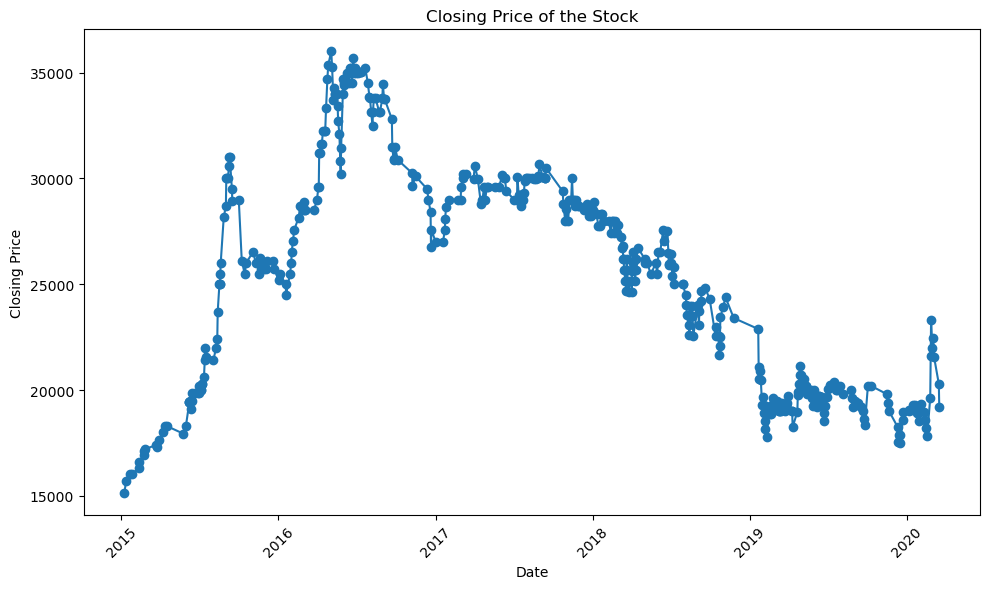

In [135]:
closing_prices = df_unl['Close']

# Create a plot for the closing price
plt.figure(figsize=(10, 6))
plt.plot(closing_prices.index, closing_prices, marker='o', linestyle='-')

# Set plot title and labels
plt.title('Closing Price of the Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [136]:
for company in companies:
    df_unl['D_Return'] = df_unl['Close'].pct_change()


In [137]:
df_unl

,Symbol,Date,Open,High,Low,Close,Vol,D_Return
Date,,,,,,,,
2015-01-08,UNL,2015-01-08,15150.0,15150.0,15150.0,15150.0,30,NaN
2015-01-12,UNL,2015-01-12,15150.0,15700.0,15450.0,15700.0,130,0.036304
2015-01-22,UNL,2015-01-22,15700.0,16015.0,15701.0,16015.0,20,0.020064
2015-01-25,UNL,2015-01-25,16015.0,16015.0,16015.0,16015.0,10,0.000000
2015-02-11,UNL,2015-02-11,16015.0,16300.0,16300.0,16300.0,30,0.017796
...,...,...,...,...,...,...,...,...
2020-03-01,UNL,2020-03-01,22865.0,22865.0,21959.0,22000.0,110,-0.057008
2020-03-03,UNL,2020-03-03,22440.0,22440.0,22440.0,22440.0,10,0.020000
2020-03-05,UNL,2020-03-05,21992.0,21992.0,21553.0,21553.0,20,-0.039528


In [138]:
df_unl.fillna(0,inplace=True)

In [139]:
df_unl['D_Return'].max()

0.10000000000000009

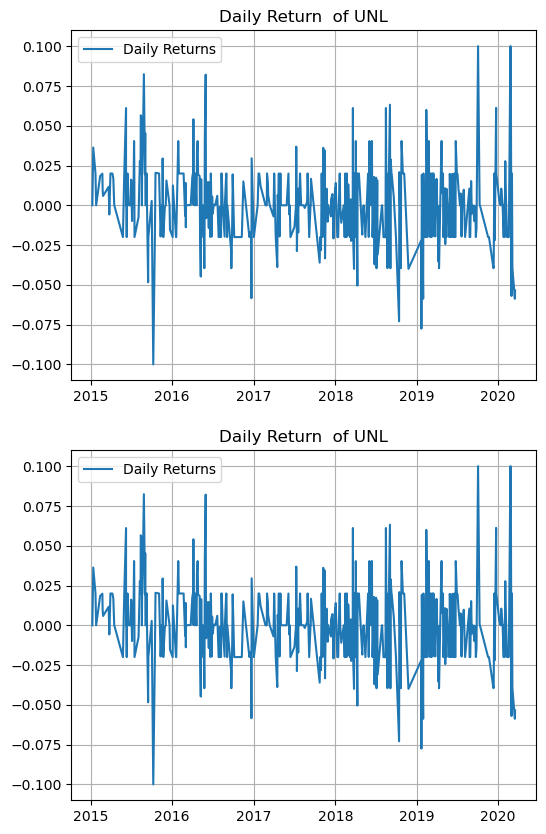

In [140]:
fig,axes=plt.subplots(2,figsize=(6,10))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(df_unl[df_unl["Symbol"]== "UNL"]["D_Return"],label="Daily Returns")    
    axs.grid()
    axs.legend()
    axs.set_title("Daily Return  of UNL")


FROM the above obervastion it is observed that % of daily return on price is more than 9% in year 2015-2016.
Again in year 2019-2020 it reached 9.5% .

 Checking stationarity
 

In [141]:
closing_prices = df_unl['Close']

# Perform the Augmented Dickey-Fuller test
result = adfuller(closing_prices)

# Extract the test statistics and p-value
test_statistic = result[0]
p_value = result[1]

# Print the results
print(f'Test Statistic: {test_statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print("P-value is less than or equal to 0.05. The data is stationary.")
else:
    print("P-value is greater than 0.05. The data is non-stationary.")


Test Statistic: -1.6908032217492082
P-Value: 0.435857054471369
P-value is greater than 0.05. The data is non-stationary.


AS it is observed that using ADF test the data of UNL is non-stationary. AS ARIMA model of TIME SERIES Works on Stationary data.
so let's make data stationary using differencing.

# making Series Stationary

In [142]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

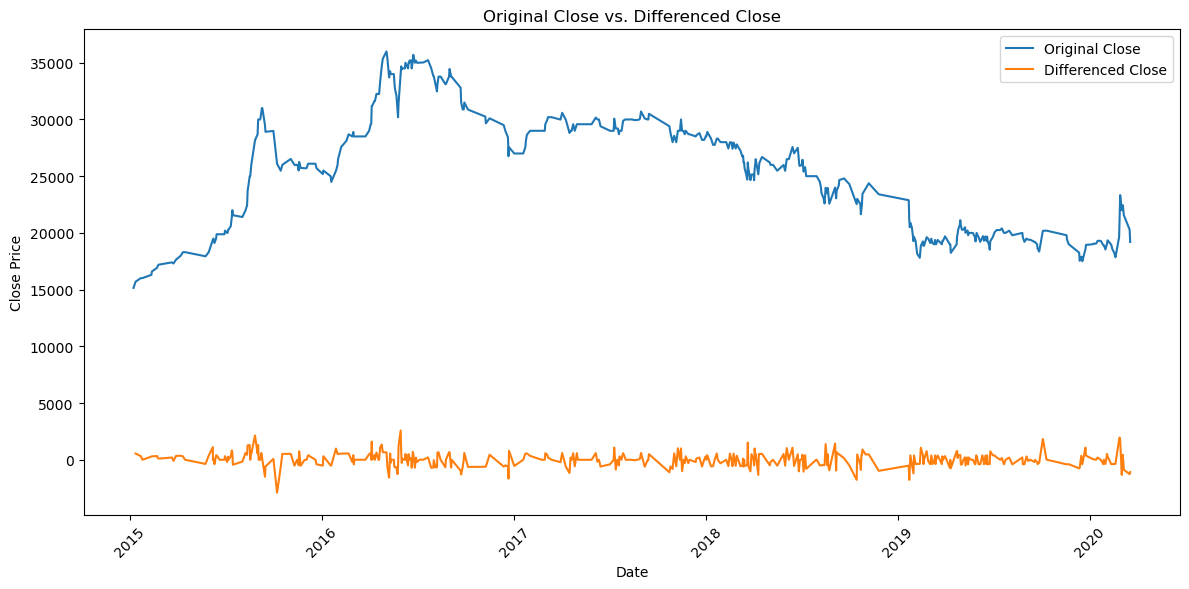

In [143]:
# Perform differencing on the 'Close' column
df_unl['Close_diff'] = df_unl['Close'].diff()

# Plot the original 'Close' and differenced 'Close_diff' columns
plt.figure(figsize=(12, 6))
plt.plot(df_unl['Close'], label='Original Close')
plt.plot(df_unl['Close_diff'], label='Differenced Close')
plt.legend()
plt.title('Original Close vs. Differenced Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


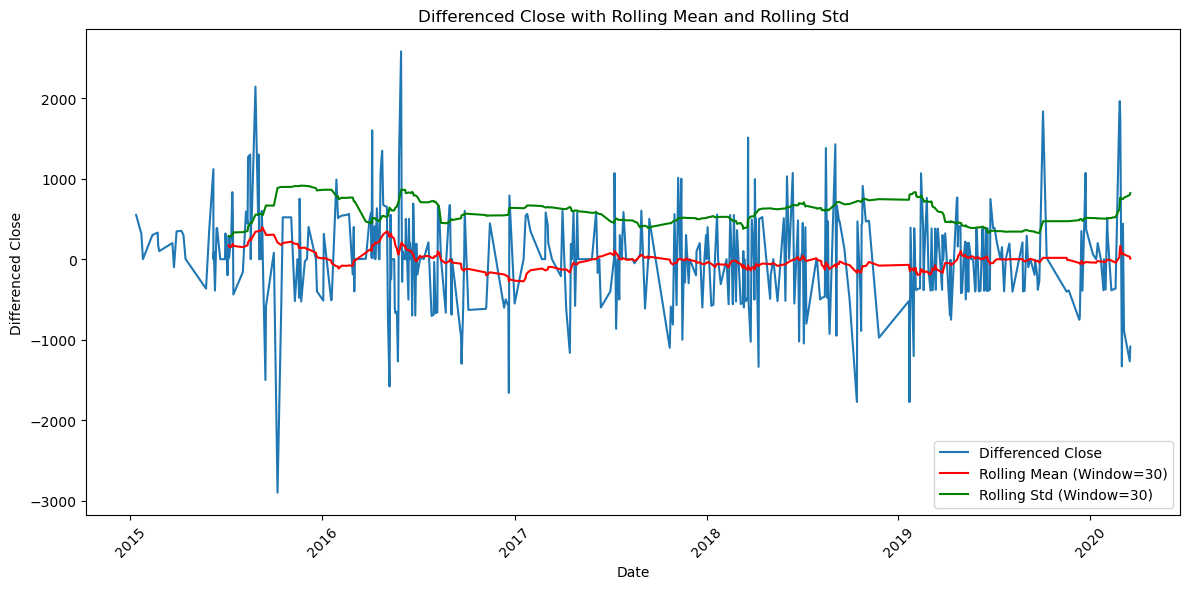

In [144]:
#Determing rolling statistics

rolling_window_size = 30
df_unl['Rolling_Mean'] = df_unl['Close_diff'].rolling(window=rolling_window_size).mean()
df_unl['Rolling_Std'] = df_unl['Close_diff'].rolling(window=rolling_window_size).std()

# Plot the original 'Close_diff' column, rolling mean, and rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df_unl['Close_diff'], label='Differenced Close')
plt.plot(df_unl['Rolling_Mean'], label=f'Rolling Mean (Window={rolling_window_size})', color='red')
plt.plot(df_unl['Rolling_Std'], label=f'Rolling Std (Window={rolling_window_size})', color='green')
plt.legend()
plt.title('Differenced Close with Rolling Mean and Rolling Std')
plt.xlabel('Date')
plt.ylabel('Differenced Close')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [145]:
df_unl['Close_diff']

Date
2015-01-08       NaN
2015-01-12     550.0
2015-01-22     315.0
2015-01-25       0.0
2015-02-11     285.0
               ...  
2020-03-01   -1330.0
2020-03-03     440.0
2020-03-05    -887.0
2020-03-16   -1267.0
2020-03-17   -1086.0
Name: Close_diff, Length: 448, dtype: float64

In [146]:
df_unl['Close_diff'].fillna(0,inplace=True)

In [147]:
df_unl['Close_diff']

Date
2015-01-08       0.0
2015-01-12     550.0
2015-01-22     315.0
2015-01-25       0.0
2015-02-11     285.0
               ...  
2020-03-01   -1330.0
2020-03-03     440.0
2020-03-05    -887.0
2020-03-16   -1267.0
2020-03-17   -1086.0
Name: Close_diff, Length: 448, dtype: float64

#Agaain applyning adafuller on differcing close price to check wheather DATA IS STATIONARY OR NOT #

In [148]:
closing_prices1 = df_unl['Close_diff']


# Perform the Augmented Dickey-Fuller test
result = adfuller(closing_prices1)

# Extract the test statistics and p-value
test_statistic = result[0]
p_value = result[1]

# Print the results
print(f'Test Statistic: {test_statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print("P-value is less than or equal to 0.05. The data is stationary.")
else:
    print("P-value is greater than 0.05. The data is non-stationary.")


Test Statistic: -18.926861064702646
P-Value: 0.0
P-value is less than or equal to 0.05. The data is stationary.


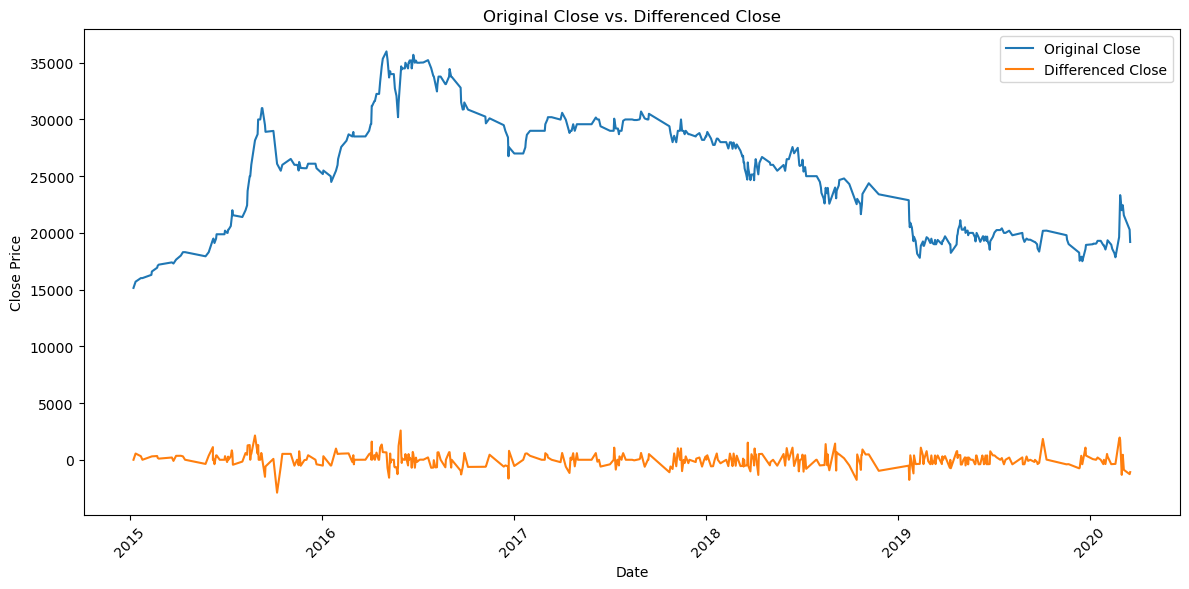

In [149]:
# Plot the original 'Close' and differenced 'Close_diff' columns
plt.figure(figsize=(12, 6))
plt.plot(df_unl['Close'], label='Original Close')
plt.plot(df_unl['Close_diff'], label='Differenced Close')
plt.legend()
plt.title('Original Close vs. Differenced Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Now the DATA is Stationary.....so we can go further with applying models..

#Autocorrelation analysis is an important step in the Exploratory Data Analysis (EDA) of time series. The autocorrelation analysis helps in detecting hidden patterns and seasonality and in checking for randomness. It is especially important when you intend to use an ARIMA model for forecasting because the autocorrelation analysis helps to identify the AR and MA parameters for the ARIMA model

In [150]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
lag_acf = acf(df_unl['Close_diff'], nlags=36)
lag_pacf = pacf(df_unl['Close_diff'], nlags=36)


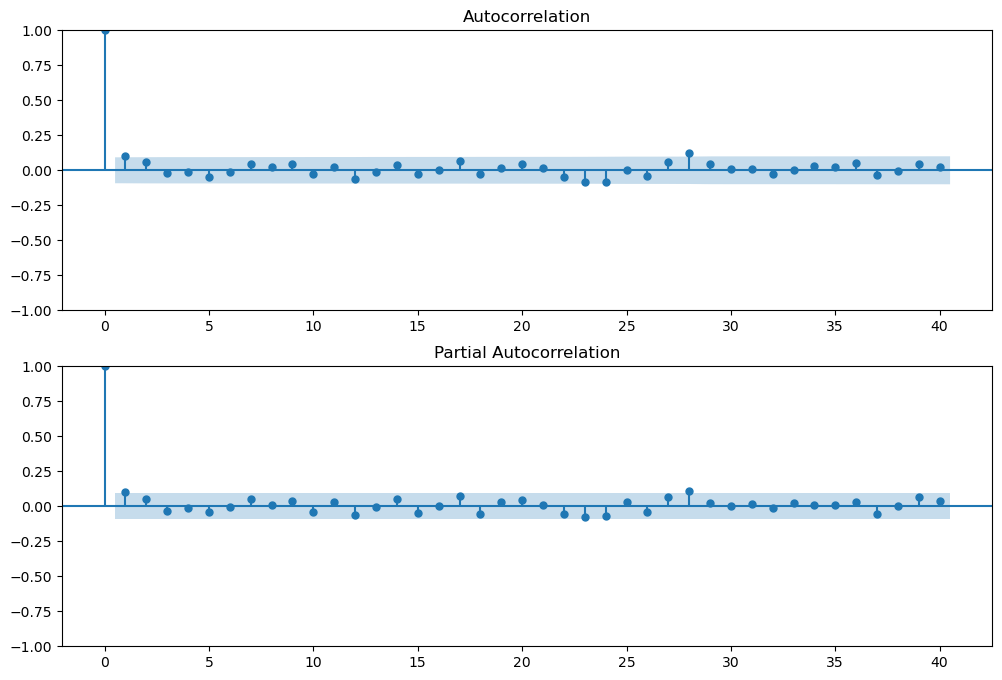

In [151]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_unl['Close_diff'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_unl['Close_diff'],lags=40,ax=ax2)

## Plot ACF (Autocorrelation Function)
plt.figure(figsize=(12, 6))
plot_acf(df_unl['Close_diff'], lags=30, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.xticks(range(0, 41, 5))
plt.grid(True)
plt.show()

# Plot PACF (Partial Autocorrelation Function)
plt.figure(figsize=(12, 6))
plot_pacf(df_unl['Close_diff'], lags=30, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.xticks(range(0, 41, 5))
plt.grid(True)
plt.show()


In [162]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA


In [167]:
order=(13,1,7)
model=ARIMA(df_unl['Close'],order=order)
model_fit=model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [168]:

type(df_unl['Close_diff'])

pandas.core.series.Series

In [165]:
actuals=df_unl['Close_diff'].tail(30)

In [166]:
actuals

Date
2019-12-11    -752.0
2019-12-12    -719.0
2019-12-15     350.0
2019-12-16       0.0
2019-12-17    -392.0
2019-12-23    1071.0
2019-12-24     370.0
2020-01-06      59.0
2020-01-07      50.0
2020-01-12       0.0
2020-01-13      50.0
2020-01-15     200.0
2020-01-21       0.0
2020-01-26    -386.0
2020-01-27       0.0
2020-01-30    -378.0
2020-02-02     514.0
2020-02-03     300.0
2020-02-10    -387.0
2020-02-12    -379.0
2020-02-16    -371.0
2020-02-18    -364.0
2020-02-25    1784.0
2020-02-26    1963.0
2020-02-27    1734.0
2020-03-01   -1330.0
2020-03-03     440.0
2020-03-05    -887.0
2020-03-16   -1267.0
2020-03-17   -1086.0
Name: Close_diff, dtype: float64

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                  448
Model:                ARIMA(10, 1, 7)   Log Likelihood               -3490.291
Date:                Mon, 28 Aug 2023   AIC                           7016.581
Time:                        15:18:16   BIC                           7090.427
Sample:                             0   HQIC                          7045.695
                                - 448                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3908      1.853     -0.211      0.833      -4.023       3.242
ar.L2          0.1403      2.038      0.069      0.945      -3.855       4.135
ar.L3         -0.2457      1.182     -0.208      0.8

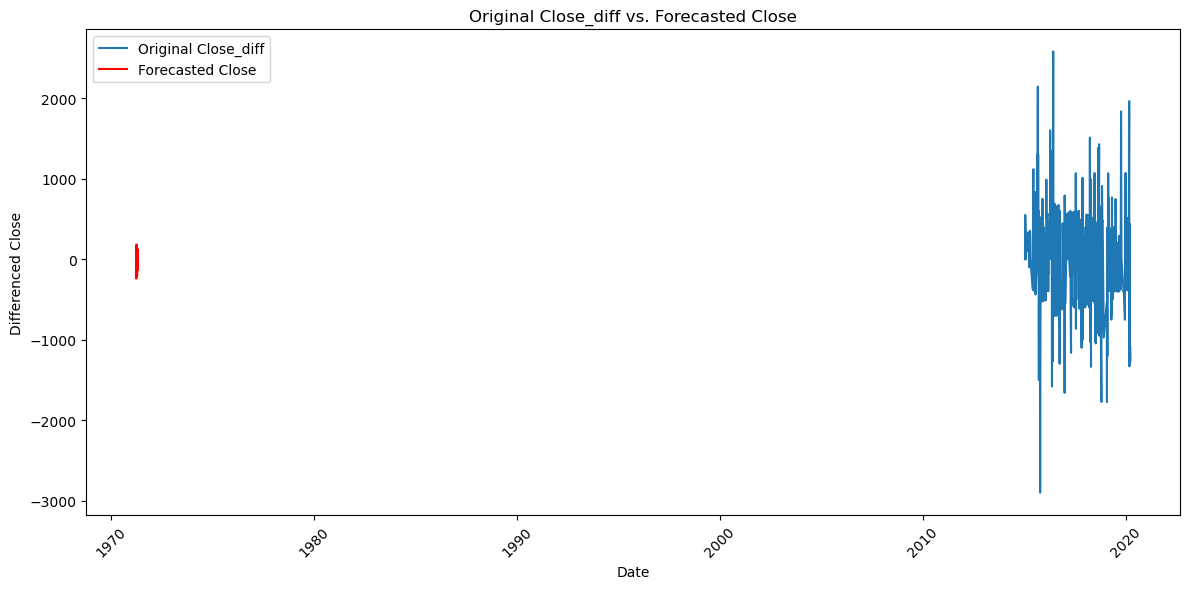

In [155]:
order = (10, 1, 7)  # Example order for ARIMA(1, 1, 1) model

model = sm.tsa.ARIMA(df_unl['Close_diff'], order=order)
results = model.fit()

# Print the model summary
print(results.summary())

# Get the predicted values (forecast)
forecast_values = results.forecast(steps=30)  # Adjust the number of steps as needed for forecasting

# Plot the original 'Close' data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_unl['Close_diff'], label='Original Close_diff')
plt.plot(forecast_values, label='Forecasted Close', color='red')
plt.legend()
plt.title('Original Close_diff vs. Forecasted Close')
plt.xlabel('Date')
plt.ylabel('Differenced Close')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [156]:
actuals = df_unl['Close_diff'].tail(30)

In [157]:
actuals

Date
2019-12-11    -752.0
2019-12-12    -719.0
2019-12-15     350.0
2019-12-16       0.0
2019-12-17    -392.0
2019-12-23    1071.0
2019-12-24     370.0
2020-01-06      59.0
2020-01-07      50.0
2020-01-12       0.0
2020-01-13      50.0
2020-01-15     200.0
2020-01-21       0.0
2020-01-26    -386.0
2020-01-27       0.0
2020-01-30    -378.0
2020-02-02     514.0
2020-02-03     300.0
2020-02-10    -387.0
2020-02-12    -379.0
2020-02-16    -371.0
2020-02-18    -364.0
2020-02-25    1784.0
2020-02-26    1963.0
2020-02-27    1734.0
2020-03-01   -1330.0
2020-03-03     440.0
2020-03-05    -887.0
2020-03-16   -1267.0
2020-03-17   -1086.0
Name: Close_diff, dtype: float64

In [158]:
forecast_values

448    101.230561
449     91.198335
450    159.367331
451    -13.374657
452   -241.038552
453    -42.535169
454    -37.480790
455     56.668909
456    182.720984
457     -5.496452
458   -147.625174
459    -48.994762
460   -171.379110
461     74.959393
462    140.909703
463     -5.515834
464    -12.824319
465    -95.464523
466   -201.197257
467     80.925665
468     33.829437
469     51.590671
470     67.845493
471   -137.919043
472   -139.904664
473     25.106025
474    -59.391587
475    127.504956
476     58.744988
477   -117.091228
Name: predicted_mean, dtype: float64

In [159]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals, forecast_values)
print('MAE: %f' % mae)

MAE: 617.179545


In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have validation data in 'validation_data' and corresponding predictions in 'forecast'
actual_values = df_unl['Close'].tail(30)
predicted_values = forecast_values

# Calculate metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Error (MAE): 19334.487688987116
Mean Squared Error (MSE): 375954450.3156836
Root Mean Squared Error (RMSE): 19389.544871287813
Mean Absolute Percentage Error (MAPE): nan


In [161]:
19334/25304

0.7640689219095795